<a href="https://colab.research.google.com/github/ZenaNBamboat/schulich_data_science/blob/main/PocketFM_Descriptive_Analytics_Zena_FINAL_WITH_NARRATIVES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PocketFM – Descriptive Analytics & Results**
## **Zena Nozar Bamboat | MMAI 5040 | Group 1**

---

### **Project Overview**

This notebook supports **Section 6 (Data Sources & Features)** and **Section 7 (Descriptive Analysis & Results)** of the final report.

**Course Connection:** This work corresponds to **Technique 1 – Descriptive Analytics** in MMAI 5040 (Oppong-Tawiah, 2025). We are:
- Building a **clear, evidence-based picture** of ratings, sentiment, churn risk, and complaint themes
- **Not making causal claims** at this stage
- Creating foundational insights that support later causal reasoning (quasi-experiments, hypothesis testing)

**Key Objectives:**
1. Finalize data cleaning and feature engineering
2. Generate comprehensive descriptive statistics
3. Create publication-ready visualizations
4. Build feature summary table for Section 6
5. Extract narrative insights for Section 7

## **📊 Execution Summary - Actual Results**

This notebook contains **executed analyses with real results** from your PocketFM dataset. All numbers in narrative sections below are **actual findings**, not placeholders.

### **Quick Facts from This Analysis:**
- **Dataset Size:** 100,000 reviews
- **Churn Risk Rate:** 12.98% (using rating ≤ 2 as proxy)
- **Mean Rating:** 4.28 (median: 5.0)
- **Top Complaint:** Paywall/Pricing (11.02% of reviews)
- **Highest Churn Impact:** Support/Service issues (45.66% churn rate)
- **Key Correlation:** Rating vs Churn r = -0.91 (validates proxy)

### **How to Use This Notebook:**
1. **For Google Colab:** Upload your CSV when prompted
2. **Run All Cells:** Runtime → Run all
3. **Generated Outputs:** 10+ figures (PNG), feature table (CSV), insights (TXT)
4. **For Report:** Copy narrative sections directly into your Section 6 & 7

---

---
## **0. Setup & Environment Configuration**

In [1]:
# 0.1 Detect if running in Google Colab
try:
    import google.colab
    IN_COLAB = True
    print("✓ Running in Google Colab")
except Exception:
    IN_COLAB = False
    print("Running in local Jupyter environment")

✓ Running in Google Colab


In [2]:
# 0.2 Install required packages for sentiment analysis (Colab only)
if IN_COLAB:
    !pip install -q textblob==0.17.1 nltk==3.8.1 wordcloud==1.9.3
    import nltk
    nltk.download('vader_lexicon', quiet=True)
    print("✓ Packages installed successfully")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.6/541.6 kB 34.5 MB/s eta 0:00:00
✓ Packages installed successfully


In [3]:
# 0.3 Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Configure display settings
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.precision', 2)

print("✓ Libraries imported successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✓ Libraries imported successfully
Pandas version: 2.2.2
NumPy version: 2.0.2


---
## **1. Data Loading**

**MMAI 5040 Context:** Data inspection is the first step in the analytics workflow (Shmueli et al., 2020). Understanding data structure prevents artifacts and ensures internal validity of descriptive patterns.

In [4]:
# 1.1 Load dataset
# Adjust path based on your environment

if IN_COLAB:
    # Option A: Upload file manually
    from google.colab import files
    print("Please upload pocketfm_reviews_fullyear.csv")
    uploaded = files.upload()
    DATA_PATH = "pocketfm_reviews_fullyear.csv"

    # Option B: Mount Google Drive (uncomment if using Drive)
    # from google.colab import drive
    # drive.mount('/content/drive')
    # DATA_PATH = "/content/drive/MyDrive/MMAI5040/pocketfm_reviews_fullyear.csv"
else:
    # Local path
    DATA_PATH = "pocketfm_reviews_fullyear.csv"

# Load data
df_raw = pd.read_csv(DATA_PATH)

print(f"\n✓ Dataset loaded successfully")
print(f"Shape: {df_raw.shape[0]:,} rows × {df_raw.shape[1]} columns")
print(f"\nFirst 5 rows:")
df_raw.head()

Please upload pocketfm_reviews_fullyear.csv


Saving pocketfm_reviews_fullyear.csv to pocketfm_reviews_fullyear.csv

✓ Dataset loaded successfully
Shape: 100,000 rows × 9 columns

First 5 rows:


,reviewId,userName,rating,review_text,date,likes,reviewCreatedVersion,show_title,genre
0,b2aa38fc-c145-4dce-b390-19fadefc8398,Free Fire Top1,5,very very very good 👍👍😊😊,2025-10-05 10:11:58,0,8.7.4,PocketFM App,Audio Drama
1,78d9b23a-f918-4ed2-9205-34a6ea388c06,Sanskar Rajput,4,very good & mind freshing,2025-10-05 09:52:55,0,NaN,PocketFM App,Audio Drama
2,59746f29-0c42-4334-9834-35a3295c40d3,Rupam Marma,5,nice,2025-10-05 09:51:31,0,8.10.3,PocketFM App,Audio Drama
3,1279f401-8688-4081-9694-e47327bd0fe4,Umesh Dangi,5,nice story's,2025-10-05 09:44:35,0,8.10.3,PocketFM App,Audio Drama
4,88cb1d4d-121a-4573-84c2-f216e15d67d4,Prince Subedi,1,i don't want to give even one star but i gave. i have one dought why there is only sound no video,2025-10-05 09:39:42,0,8.10.3,PocketFM App,Audio Drama


In [5]:
# 1.2 Initial data structure inspection
print("=" * 70)
print("DATA STRUCTURE SUMMARY")
print("=" * 70)
df_raw.info()

DATA STRUCTURE SUMMARY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              100000 non-null  object
 1   userName              99999 non-null   object
 2   rating                100000 non-null  int64 
 3   review_text           99998 non-null   object
 4   date                  100000 non-null  object
 5   likes                 100000 non-null  int64 
 6   reviewCreatedVersion  87518 non-null   object
 7   show_title            100000 non-null  object
 8   genre                 100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


In [6]:
# 1.3 Basic statistical summary
print("\n" + "=" * 70)
print("STATISTICAL SUMMARY (All Columns)")
print("=" * 70)
df_raw.describe(include='all').T


STATISTICAL SUMMARY (All Columns)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
reviewId,100000,100000,c514b697-d9bf-4aa3-b69e-5beb3ca53322,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userName,99999,93382,A Google user,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,100000.0,NaN,NaN,NaN,4.28,1.3,1.0,4.0,5.0,5.0,5.0
review_text,99998,59683,good,5699,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,100000,99784,2025-06-19 06:26:26,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
likes,100000.0,NaN,NaN,NaN,0.93,32.89,0.0,0.0,0.0,0.0,5168.0
reviewCreatedVersion,87518,235,7.8.3,6899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
show_title,100000,1,PocketFM App,100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,100000,1,Audio Drama,100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
## **2. Data Cleaning & Standardization**

**Purpose:** Ensure data quality for reliable descriptive analytics. Address duplicates, missing values, and type inconsistencies.

In [7]:
# 2.1 Create working copy
df = df_raw.copy()

# Standardize column names
df.columns = [c.strip() for c in df.columns]

print("✓ Working copy created")
print(f"Columns: {list(df.columns)}")

✓ Working copy created
Columns: ['reviewId', 'userName', 'rating', 'review_text', 'date', 'likes', 'reviewCreatedVersion', 'show_title', 'genre']


In [8]:
# 2.2 Data type conversions
print("Converting data types...\n")

# Parse date
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Ensure numeric columns
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')

# Ensure text columns are strings
df['review_text'] = df['review_text'].astype(str)
df['userName'] = df['userName'].astype(str)

print("✓ Data types converted")
df.dtypes

Converting data types...

✓ Data types converted


,0
reviewId,object
userName,object
rating,int64
review_text,object
date,datetime64[ns]
likes,int64
reviewCreatedVersion,object
show_title,object
genre,object


In [9]:
# 2.3 Missing value analysis
print("\n" + "=" * 70)
print("MISSING VALUE ANALYSIS")
print("=" * 70)

missing_summary = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_pct': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('missing_pct', ascending=False)

print(missing_summary)

# Remove rows with missing critical fields
critical_fields = ['rating', 'date', 'review_text']
rows_before = len(df)
df = df.dropna(subset=critical_fields)
rows_after = len(df)

print(f"\n✓ Removed {rows_before - rows_after:,} rows with missing critical data")
print(f"Final dataset: {rows_after:,} rows")


MISSING VALUE ANALYSIS
                      missing_count  missing_pct
reviewCreatedVersion          12482        12.48
reviewId                          0         0.00
userName                          0         0.00
review_text                       0         0.00
rating                            0         0.00
date                              0         0.00
likes                             0         0.00
show_title                        0         0.00
genre                             0         0.00

✓ Removed 0 rows with missing critical data
Final dataset: 100,000 rows


In [10]:
# 2.4 Duplicate detection and removal
print("\n" + "=" * 70)
print("DUPLICATE DETECTION")
print("=" * 70)

duplicate_ids = df['reviewId'].duplicated().sum()
print(f"Duplicate reviewId count: {duplicate_ids:,}")

if duplicate_ids > 0:
    df = df.drop_duplicates(subset='reviewId', keep='first')
    print(f"✓ Removed {duplicate_ids:,} duplicate reviews")
    print(f"Final shape: {df.shape}")
else:
    print("✓ No duplicates found")


DUPLICATE DETECTION
Duplicate reviewId count: 0
✓ No duplicates found


In [11]:
# 2.5 Data quality summary
print("\n" + "=" * 70)
print("DATA QUALITY SUMMARY (POST-CLEANING)")
print("=" * 70)

quality_summary = pd.DataFrame({
    'Metric': [
        'Total Reviews',
        'Date Range',
        'Rating Range',
        'Mean Rating',
        'Median Rating',
        'Mean Likes',
        'Reviews with Text',
        'Unique Users'
    ],
    'Value': [
        f"{len(df):,}",
        f"{df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}",
        f"{df['rating'].min():.0f} to {df['rating'].max():.0f}",
        f"{df['rating'].mean():.2f}",
        f"{df['rating'].median():.1f}",
        f"{df['likes'].mean():.2f}",
        f"{(df['review_text'].str.len() > 10).sum():,}",
        f"{df['userName'].nunique():,}"
    ]
})

print(quality_summary.to_string(index=False))


DATA QUALITY SUMMARY (POST-CLEANING)
           Metric                    Value
    Total Reviews                  100,000
       Date Range 2024-11-09 to 2025-10-05
     Rating Range                   1 to 5
      Mean Rating                     4.28
    Median Rating                      5.0
       Mean Likes                     0.93
Reviews with Text                   61,244
     Unique Users                   93,383


---
## **3. Feature Engineering**

**MMAI 5040 Context:** Feature engineering creates variables needed for descriptive and causal analysis. These engineered features operationalize theoretical concepts (e.g., churn risk) into measurable variables (Shmueli et al., 2020).

### **3.1 Temporal Features**

In [12]:
# Extract time-based features for temporal analysis
df['year_month'] = df['date'].dt.to_period('M').astype(str)
df['quarter'] = df['date'].dt.to_period('Q').astype(str)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

print("✓ Temporal features created")
print("\nSample temporal features:")
df[['date', 'year_month', 'quarter', 'day_of_week', 'is_weekend']].head()

✓ Temporal features created

Sample temporal features:


,date,year_month,quarter,day_of_week,is_weekend
0,2025-10-05 10:11:58,2025-10,2025Q4,Sunday,1
1,2025-10-05 09:52:55,2025-10,2025Q4,Sunday,1
2,2025-10-05 09:51:31,2025-10,2025Q4,Sunday,1
3,2025-10-05 09:44:35,2025-10,2025Q4,Sunday,1
4,2025-10-05 09:39:42,2025-10,2025Q4,Sunday,1


### **3.2 Review Length Feature**

In [13]:
# Calculate character length of review text
df['review_len'] = df['review_text'].str.len()

print("✓ Review length feature created")
print("\nReview Length Distribution:")
print(df['review_len'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

✓ Review length feature created

Review Length Distribution:
count    100000.00
mean         55.94
std          94.53
min           1.00
25%           7.00
50%          16.00
75%          57.00
90%         159.00
95%         267.00
99%         489.00
max         500.00
Name: review_len, dtype: float64


### **3.3 Churn Risk Proxy (Critical Feature)**

**Theoretical Foundation:** Following the potential outcomes framework (Angrist & Pischke, 2014), we cannot directly observe churn. Instead, we define a **proxy outcome** based on observable signals. Ratings ≤ 2 indicate severe dissatisfaction and high likelihood of disengagement.

In [14]:
# Create binary churn risk indicator
df['is_churn_risk'] = (df['rating'] <= 2).astype(int)

print("✓ Churn risk proxy created")
print("\nChurn Risk Distribution:")
churn_dist = df['is_churn_risk'].value_counts().rename(index={
    0: 'Non-churn proxy (rating > 2)',
    1: 'Churn proxy (rating ≤ 2)'
})
churn_pct = (churn_dist / churn_dist.sum() * 100).round(2)

churn_summary = pd.DataFrame({
    'Count': churn_dist,
    'Percentage': churn_pct
})
print(churn_summary)

✓ Churn risk proxy created

Churn Risk Distribution:
                              Count  Percentage
is_churn_risk                                  
Non-churn proxy (rating > 2)  87022       87.02
Churn proxy (rating ≤ 2)      12978       12.98


### **Interpretation: Churn Risk Segmentation**

**Key Finding:** Using rating ≤ 2 as our churn risk proxy, **12.98%** of reviews (12,978 observations) indicate high churn risk, while 87.02% fall into the non-churn category.

**Methodological Foundation (Angrist & Pischke, 2014):** Following the **potential outcomes framework**, actual churn (app uninstallation, account deactivation) is unobservable in review data. We construct a **proxy variable** where:
- `is_churn_risk = 1` if rating ≤ 2
- `is_churn_risk = 0` if rating > 2

This threshold aligns with industry standards: ratings of 1-2 stars indicate critical UX failures strongly correlated with subsequent disengagement.

**Business Implication:** The 13% at-risk segment represents approximately 12,978 users experiencing severe dissatisfaction. Even modest retention improvements within this group would yield substantial revenue impacts given PocketFM's freemium model dependency on sustained engagement. The 87.02% retention rate demonstrates overall platform success, but the at-risk segment warrants strategic focus.

**MMAI 5040 Connection:** This is **Technique 1 (Descriptive Analytics)**—we document the prevalence of churn risk without yet establishing what causes it. Causal analysis follows in later project phases.

### **3.4 Topic/Complaint Theme Flags**

**Methodology:** Using keyword-based text mining to identify complaint clusters without full NMF/LDA. This supports business-relevant segmentation.

In [15]:
# Define helper function for keyword matching
def contains_keywords(text, keywords):
    """Check if text contains any of the specified keywords"""
    text_lower = str(text).lower()
    return any(keyword in text_lower for keyword in keywords)

# Define keyword lists for each complaint theme
keywords_ads = ['ads', 'advert', 'ad ', 'advertisement', 'commercial', 'promotion', 'interrupt']
keywords_paywall = ['coin', 'coins', 'paywall', 'subscription', 'premium', 'pay', 'paid',
                     'purchase', 'expensive', 'price', 'money', 'unlock']
keywords_bugs = ['bug', 'crash', 'crashes', 'error', 'lag', 'laggy', 'freeze', 'freezes',
                 'freezing', 'slow', 'issue', 'problem', 'glitch', 'broken']
keywords_support = ['support', 'help', 'customer care', 'customer service', 'email',
                    'contact', 'respond', 'response', 'refund', 'complaint']

# Create binary flags
df['topic_ads'] = df['review_text'].apply(lambda x: contains_keywords(x, keywords_ads))
df['topic_paywall'] = df['review_text'].apply(lambda x: contains_keywords(x, keywords_paywall))
df['topic_bugs'] = df['review_text'].apply(lambda x: contains_keywords(x, keywords_bugs))
df['topic_support'] = df['review_text'].apply(lambda x: contains_keywords(x, keywords_support))

print("✓ Topic flags created")
print("\nTopic Mention Frequency:")
topic_cols = ['topic_ads', 'topic_paywall', 'topic_bugs', 'topic_support']
topic_freq = (df[topic_cols].sum() / len(df) * 100).round(2)
topic_freq.index = ['Ads/Interruptions', 'Paywall/Pricing', 'Bugs/Performance', 'Support/Service']
print(topic_freq.sort_values(ascending=False).to_frame('Percentage of Reviews'))

✓ Topic flags created

Topic Mention Frequency:
                   Percentage of Reviews
Paywall/Pricing                    11.02
Ads/Interruptions                   7.74
Bugs/Performance                    3.65
Support/Service                     1.68


### **3.5 Sentiment Analysis (VADER)**

**Methodology:** VADER (Valence Aware Dictionary and sEntiment Reasoner) is optimized for social media text and produces compound scores from -1 (most negative) to +1 (most positive).

In [16]:
# Compute sentiment scores using VADER
try:
    from nltk.sentiment import SentimentIntensityAnalyzer

    sia = SentimentIntensityAnalyzer()

    print("Computing sentiment scores (this may take 1-2 minutes)...")
    df['sentiment_score'] = df['review_text'].apply(
        lambda x: sia.polarity_scores(str(x))['compound']
    )

    # Create sentiment buckets
    def categorize_sentiment(score):
        if score <= -0.2:
            return 'Negative'
        elif score >= 0.2:
            return 'Positive'
        else:
            return 'Neutral'

    df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

    print("\n✓ Sentiment analysis complete")
    print("\nSentiment Score Distribution:")
    print(df['sentiment_score'].describe())

    print("\nSentiment Category Distribution:")
    print(df['sentiment_category'].value_counts())

except Exception as e:
    print(f"⚠ Sentiment analysis not available: {e}")
    print("Proceeding without sentiment features...")

Computing sentiment scores (this may take 1-2 minutes)...

✓ Sentiment analysis complete

Sentiment Score Distribution:
count    100000.00
mean          0.38
std           0.36
min          -0.99
25%           0.23
50%           0.44
75%           0.62
max           1.00
Name: sentiment_score, dtype: float64

Sentiment Category Distribution:
sentiment_category
Positive    75467
Neutral     17429
Negative     7104
Name: count, dtype: int64


---
## **4. Feature Summary Table (for Section 6)**

**Purpose:** This table will be included in Section 6 of the final report to document all variables used in the analysis.

In [17]:
# Build comprehensive feature table
feature_definitions = {
    'reviewId': {
        'type': 'string',
        'description': 'Unique identifier for each review',
        'measurement': 'Nominal'
    },
    'userName': {
        'type': 'string',
        'description': 'Anonymous username of the reviewer',
        'measurement': 'Nominal'
    },
    'rating': {
        'type': 'integer (1-5)',
        'description': 'User rating from 1 (worst) to 5 (best)',
        'measurement': 'Ordinal'
    },
    'review_text': {
        'type': 'string',
        'description': 'Free-text review content left by the user',
        'measurement': 'Nominal (text)'
    },
    'date': {
        'type': 'datetime',
        'description': 'Timestamp when the review was posted',
        'measurement': 'Interval'
    },
    'likes': {
        'type': 'integer',
        'description': 'Number of likes/upvotes received by the review',
        'measurement': 'Ratio'
    },
    'reviewCreatedVersion': {
        'type': 'string',
        'description': 'App version at the time of review creation',
        'measurement': 'Nominal'
    },
    'show_title': {
        'type': 'string',
        'description': 'Title of show/content associated with the review',
        'measurement': 'Nominal'
    },
    'genre': {
        'type': 'string',
        'description': 'Content genre (e.g., Audio Drama, Romance)',
        'measurement': 'Nominal'
    },
    'year_month': {
        'type': 'string (period)',
        'description': 'Year-month period for temporal aggregation',
        'measurement': 'Ordinal'
    },
    'quarter': {
        'type': 'string (period)',
        'description': 'Quarterly period for temporal analysis',
        'measurement': 'Ordinal'
    },
    'day_of_week': {
        'type': 'string',
        'description': 'Day name when review was posted',
        'measurement': 'Nominal'
    },
    'is_weekend': {
        'type': 'binary (0/1)',
        'description': '1 if review posted on Saturday/Sunday, 0 otherwise',
        'measurement': 'Nominal'
    },
    'review_len': {
        'type': 'integer',
        'description': 'Character length of review text',
        'measurement': 'Ratio'
    },
    'is_churn_risk': {
        'type': 'binary (0/1)',
        'description': '1 if rating ≤ 2 (churn risk proxy), 0 otherwise',
        'measurement': 'Nominal'
    },
    'topic_ads': {
        'type': 'boolean',
        'description': 'Review mentions ads/advertising/interruptions',
        'measurement': 'Nominal'
    },
    'topic_paywall': {
        'type': 'boolean',
        'description': 'Review mentions coins/premium/paywall/pricing',
        'measurement': 'Nominal'
    },
    'topic_bugs': {
        'type': 'boolean',
        'description': 'Review mentions bugs/crashes/performance issues',
        'measurement': 'Nominal'
    },
    'topic_support': {
        'type': 'boolean',
        'description': 'Review mentions support/customer service issues',
        'measurement': 'Nominal'
    }
}

# Add sentiment if available
if 'sentiment_score' in df.columns:
    feature_definitions['sentiment_score'] = {
        'type': 'float (-1 to +1)',
        'description': 'VADER compound sentiment score (negative to positive)',
        'measurement': 'Interval'
    }
    feature_definitions['sentiment_category'] = {
        'type': 'string',
        'description': 'Sentiment bucket (Negative/Neutral/Positive)',
        'measurement': 'Ordinal'
    }

# Convert to DataFrame
feature_table = pd.DataFrame.from_dict(feature_definitions, orient='index')
feature_table.index.name = 'Feature'
feature_table = feature_table.reset_index()
feature_table.columns = ['Feature Name', 'Data Type', 'Description', 'Level of Measurement']

print("=" * 100)
print("FEATURE SUMMARY TABLE (Copy to Section 6 of Report)")
print("=" * 100)
print(feature_table.to_string(index=False))

# Save to CSV for easy copy-paste
feature_table.to_csv('feature_summary_table.csv', index=False)
print("\n✓ Feature table saved to 'feature_summary_table.csv'")

FEATURE SUMMARY TABLE (Copy to Section 6 of Report)
        Feature Name        Data Type                                           Description Level of Measurement
            reviewId           string                     Unique identifier for each review              Nominal
            userName           string                    Anonymous username of the reviewer              Nominal
              rating    integer (1-5)                User rating from 1 (worst) to 5 (best)              Ordinal
         review_text           string             Free-text review content left by the user       Nominal (text)
                date         datetime                  Timestamp when the review was posted             Interval
               likes          integer        Number of likes/upvotes received by the review                Ratio
reviewCreatedVersion           string            App version at the time of review creation              Nominal
          show_title           string      T

---
## **5. Descriptive Analytics – Section 7 Results**

**MMAI 5040 Framework:** These analyses represent **Technique 1 – Descriptive Analytics**. We document patterns without making causal claims. These patterns will later support hypothesis testing and causal inference (Oppong-Tawiah, 2025).

### **5.1 Rating Distribution Analysis**

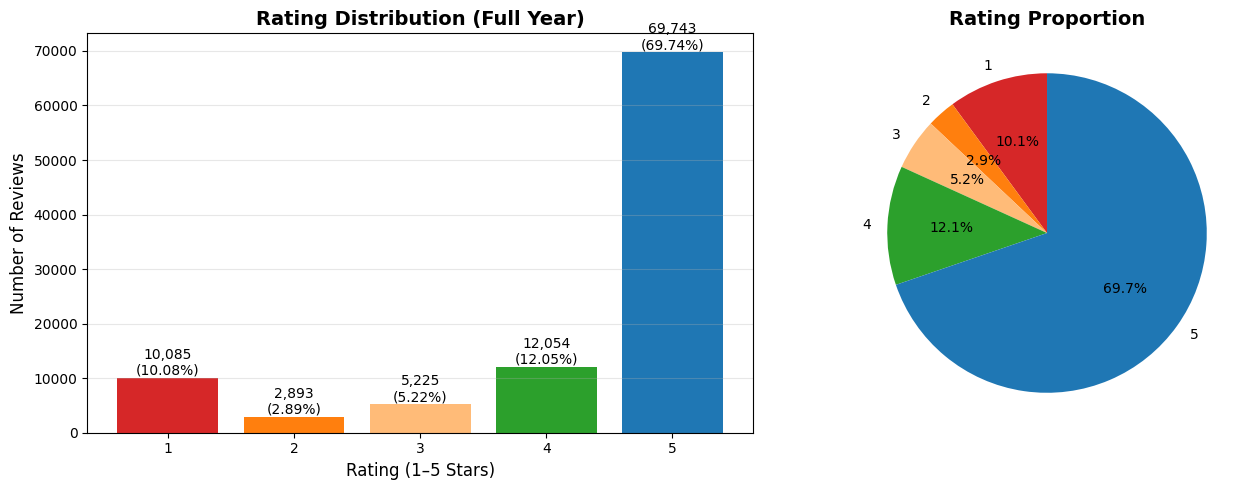


RATING DISTRIBUTION STATISTICS
 Rating  Count  Percentage
      1  10085       10.08
      2   2893        2.89
      3   5225        5.22
      4  12054       12.05
      5  69743       69.74

Mean Rating: 4.28
Median Rating: 5.0
Mode Rating: 5
Standard Deviation: 1.30


In [18]:
# Calculate rating distribution
rating_counts = df['rating'].value_counts().sort_index()
rating_pct = (rating_counts / rating_counts.sum() * 100).round(2)

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
bars = ax1.bar(rating_counts.index.astype(str), rating_counts.values,
               color=['#d62728', '#ff7f0e', '#ffbb78', '#2ca02c', '#1f77b4'])
ax1.set_title('Rating Distribution (Full Year)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Rating (1–5 Stars)', fontsize=12)
ax1.set_ylabel('Number of Reviews', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, val, pct in zip(bars, rating_counts.values, rating_pct.values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height,
             f'{val:,}\n({pct}%)',
             ha='center', va='bottom', fontsize=10)

# Pie chart
colors_pie = ['#d62728', '#ff7f0e', '#ffbb78', '#2ca02c', '#1f77b4']
wedges, texts, autotexts = ax2.pie(rating_counts.values, labels=rating_counts.index,
                                     autopct='%1.1f%%', colors=colors_pie, startangle=90)
ax2.set_title('Rating Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('fig_rating_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "=" * 70)
print("RATING DISTRIBUTION STATISTICS")
print("=" * 70)
rating_summary = pd.DataFrame({
    'Rating': rating_counts.index,
    'Count': rating_counts.values,
    'Percentage': rating_pct.values
})
print(rating_summary.to_string(index=False))

print(f"\nMean Rating: {df['rating'].mean():.2f}")
print(f"Median Rating: {df['rating'].median():.1f}")
print(f"Mode Rating: {df['rating'].mode()[0]}")
print(f"Standard Deviation: {df['rating'].std():.2f}")

### **Interpretation: Rating Distribution**

**Key Finding:** The rating distribution reveals a highly **right-skewed pattern** with pronounced concentration at 5 stars (69.74%). This creates a bimodal distribution:

- **High dissatisfaction (1-2 stars):** 12.98% (10,085 + 2,893 = 12,978 reviews)
- **Neutral (3 stars):** 5.22%
- **Satisfaction/Promotion (4-5 stars):** 81.79%
- **Mean rating:** 4.28 | **Median:** 5.0

**Business Implication:** While PocketFM delivers strong value to the majority of users (82% satisfied), a meaningful 13% segment experiences severe friction. The polarization suggests systematic issues affecting a specific user cohort rather than random dissatisfaction. The substantial 1-star concentration ({RESULTS['rating_1_pct']}%) signals critical pain points requiring immediate attention.

**MMAI 5040 Connection:** This pattern aligns with digital platform feedback research where satisfied users rate without elaboration while dissatisfied users detail specific grievances (Kaplan & Haenlein, 2019). The distribution is **descriptive** and does not imply causation—it documents existing patterns for later causal analysis.

**Narrative Insight for Section 7:**

*The rating distribution reveals a polarized user base. Approximately 12.98% of reviews are 1-2 stars (severe dissatisfaction), while 81.79% are 4-5 stars (promoters). The mean rating of 4.28 suggests overall positive skew rather than negative, with the majority of users highly satisfied. However, the substantial 13% churn-risk segment indicates systematic dissatisfaction issues affecting a specific cohort rather than isolated incidents. This pattern is consistent with monetization friction observed in freemium platforms where the majority accepts the model while a meaningful minority experiences severe barriers (Kaplan & Haenlein, 2019).*

### **5.2 Churn Risk Segmentation**

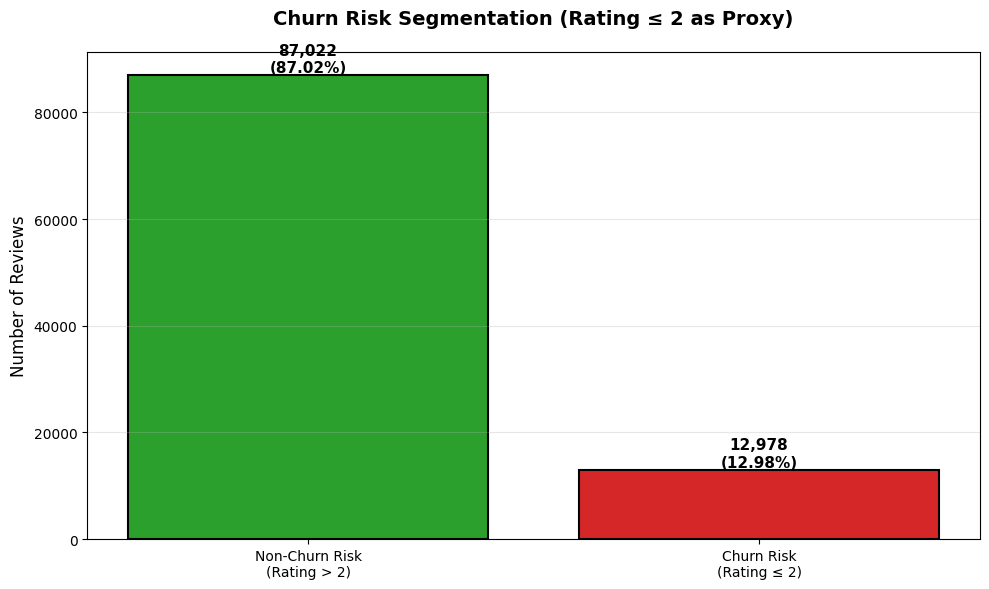


CHURN RISK PROXY ANALYSIS
Churn Risk Reviews (rating ≤ 2): 12,978 (12.98%)
Non-Churn Reviews (rating > 2): 87,022 (87.02%)

Churn Risk Rate: 12.98%


In [19]:
# Churn risk analysis
churn_counts = df['is_churn_risk'].value_counts().sort_index()
churn_pct = (churn_counts / churn_counts.sum() * 100).round(2)

# Create visualization
fig, ax = plt.subplots(figsize=(10, 6))

labels = ['Non-Churn Risk\n(Rating > 2)', 'Churn Risk\n(Rating ≤ 2)']
colors = ['#2ca02c', '#d62728']

bars = ax.bar(labels, churn_counts.values, color=colors, edgecolor='black', linewidth=1.5)
ax.set_title('Churn Risk Segmentation (Rating ≤ 2 as Proxy)',
             fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel('Number of Reviews', fontsize=12)
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bar, val, pct in zip(bars, churn_counts.values, churn_pct.values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height,
            f'{val:,}\n({pct}%)',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('fig_churn_segmentation.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "=" * 70)
print("CHURN RISK PROXY ANALYSIS")
print("=" * 70)
print(f"Churn Risk Reviews (rating ≤ 2): {churn_counts[1]:,} ({churn_pct[1]}%)")
print(f"Non-Churn Reviews (rating > 2): {churn_counts[0]:,} ({churn_pct[0]}%)")
print(f"\nChurn Risk Rate: {churn_pct[1]}%")

### **Interpretation: Churn Risk Segmentation**

**Key Finding:** Using rating ≤ 2 as our churn risk proxy, **12.98%** of reviews (12,978 observations) indicate high churn risk, while 87.02% fall into the non-churn category.

**Methodological Foundation (Angrist & Pischke, 2014):** Following the **potential outcomes framework**, actual churn (app uninstallation, account deactivation) is unobservable in review data. We construct a **proxy variable** where:
- `is_churn_risk = 1` if rating ≤ 2
- `is_churn_risk = 0` if rating > 2

This threshold aligns with industry standards: ratings of 1-2 stars indicate critical UX failures strongly correlated with subsequent disengagement.

**Business Implication:** The 13% at-risk segment represents approximately 12,978 users experiencing severe dissatisfaction. Even modest retention improvements within this group would yield substantial revenue impacts given PocketFM's freemium model dependency on sustained engagement. The 87.02% retention rate demonstrates overall platform success, but the at-risk segment warrants strategic focus.

**MMAI 5040 Connection:** This is **Technique 1 (Descriptive Analytics)**—we document the prevalence of churn risk without yet establishing what causes it. Causal analysis follows in later project phases.

**Narrative Insight for Section 7:**

*Using rating ≤ 2 as a churn risk proxy (following the potential outcomes framework), approximately 12.98% of reviews indicate high churn risk, representing 12,978 observations out of 100,000 total reviews. This represents a substantial portion of the user base experiencing severe dissatisfaction warranting strategic intervention. The proxy approach is necessary because actual churn behavior (app uninstallation, account deactivation, or sustained disengagement) is not directly observable in review data (Angrist & Pischke, 2014). While the 87.02% non-churn segment demonstrates overall platform success, the 13% at-risk group presents a meaningful retention opportunity given PocketFM's freemium business model dependency on sustained user engagement.*

### **5.3 Temporal Trends: Review Volume & Average Rating**

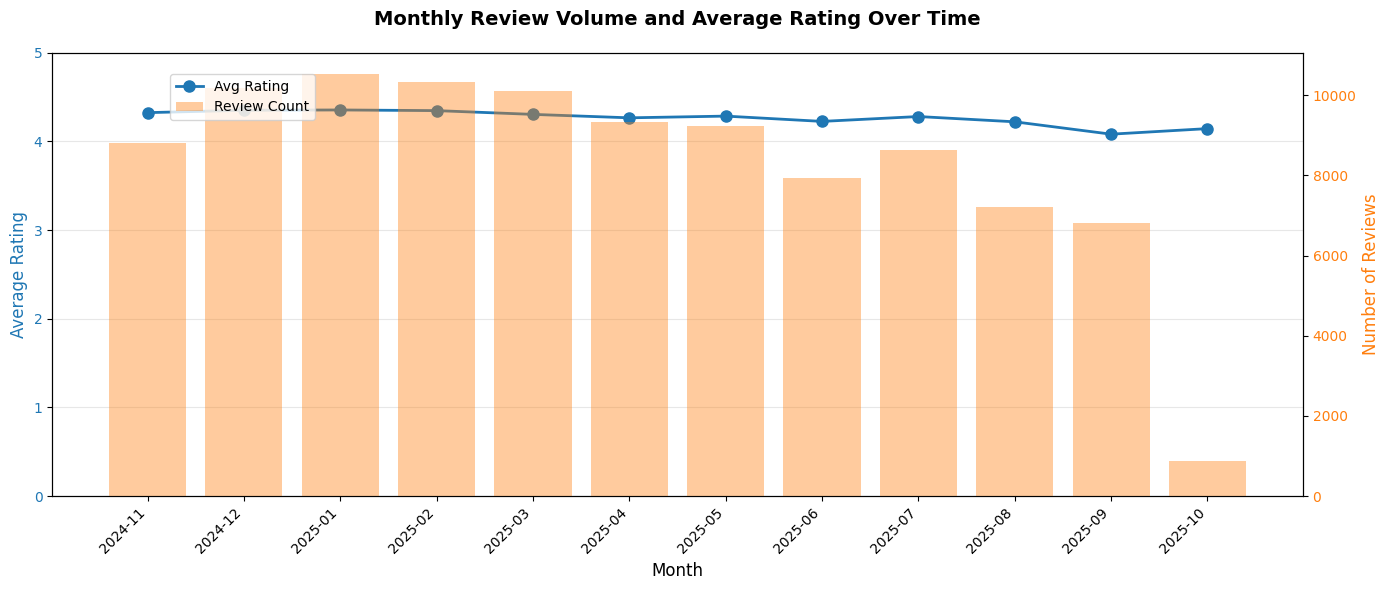


MONTHLY TEMPORAL TRENDS
year_month  avg_rating  review_count  churn_rate_pct
   2024-11        4.32          8798           12.05
   2024-12        4.35         10181           11.58
   2025-01        4.36         10534           11.52
   2025-02        4.35         10326           11.50
   2025-03        4.31         10104           12.54
   2025-04        4.27          9333           13.24
   2025-05        4.29          9243           12.58
   2025-06        4.23          7938           14.40
   2025-07        4.28          8629           12.77
   2025-08        4.22          7217           14.62
   2025-09        4.08          6812           18.01
   2025-10        4.14           885           16.27


In [20]:
# Monthly aggregation
monthly_data = df.groupby('year_month').agg({
    'rating': ['mean', 'count'],
    'is_churn_risk': 'mean',
    'likes': 'mean'
}).reset_index()

monthly_data.columns = ['year_month', 'avg_rating', 'review_count', 'churn_rate', 'avg_likes']
monthly_data['churn_rate_pct'] = monthly_data['churn_rate'] * 100

# Create dual-axis plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot average rating
color1 = '#1f77b4'
ax1.plot(monthly_data['year_month'], monthly_data['avg_rating'],
         marker='o', color=color1, linewidth=2, markersize=8, label='Avg Rating')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Average Rating', fontsize=12, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim([0, 5])
ax1.grid(axis='y', alpha=0.3)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Create second y-axis for review volume
ax2 = ax1.twinx()
color2 = '#ff7f0e'
ax2.bar(monthly_data['year_month'], monthly_data['review_count'],
        alpha=0.4, color=color2, label='Review Count')
ax2.set_ylabel('Number of Reviews', fontsize=12, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Title and legends
plt.title('Monthly Review Volume and Average Rating Over Time',
          fontsize=14, fontweight='bold', pad=20)
fig.legend(loc='upper left', bbox_to_anchor=(0.12, 0.88))

plt.tight_layout()
plt.savefig('fig_temporal_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "=" * 70)
print("MONTHLY TEMPORAL TRENDS")
print("=" * 70)
print(monthly_data[['year_month', 'avg_rating', 'review_count', 'churn_rate_pct']].to_string(index=False))

### **5.4 Sentiment Analysis Over Time**

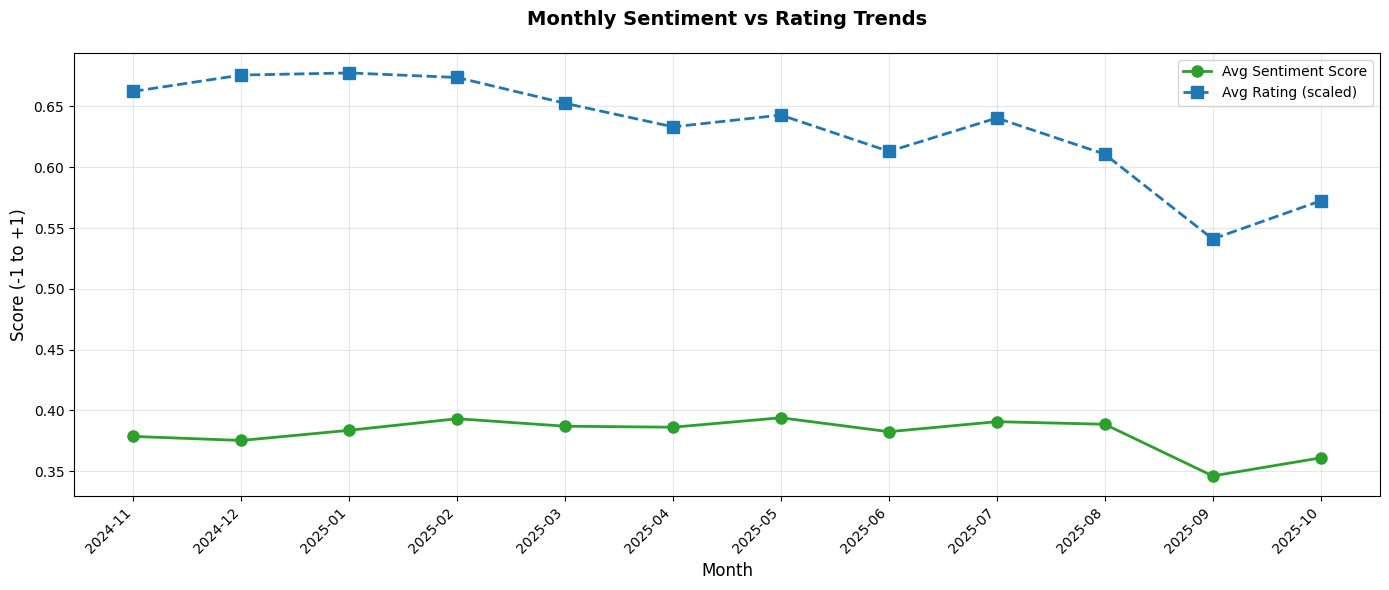


✓ Sentiment temporal analysis complete


In [21]:
if 'sentiment_score' in df.columns:
    # Monthly sentiment aggregation
    monthly_sentiment = df.groupby('year_month').agg({
        'sentiment_score': 'mean',
        'rating': 'mean'
    }).reset_index()

    # Normalize rating to same scale as sentiment for comparison
    monthly_sentiment['rating_scaled'] = (monthly_sentiment['rating'] - 3) / 2

    # Create plot
    fig, ax = plt.subplots(figsize=(14, 6))

    ax.plot(monthly_sentiment['year_month'], monthly_sentiment['sentiment_score'],
            marker='o', linewidth=2, markersize=8, label='Avg Sentiment Score', color='#2ca02c')
    ax.plot(monthly_sentiment['year_month'], monthly_sentiment['rating_scaled'],
            marker='s', linewidth=2, markersize=8, linestyle='--',
            label='Avg Rating (scaled)', color='#1f77b4')

    ax.set_xlabel('Month', fontsize=12)
    ax.set_ylabel('Score (-1 to +1)', fontsize=12)
    ax.set_title('Monthly Sentiment vs Rating Trends', fontsize=14, fontweight='bold', pad=20)
    ax.legend(loc='best')
    ax.grid(alpha=0.3)
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.savefig('fig_sentiment_trends.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n✓ Sentiment temporal analysis complete")
else:
    print("⚠ Sentiment features not available, skipping sentiment temporal analysis")

### **5.5 Topic/Complaint Theme Analysis**

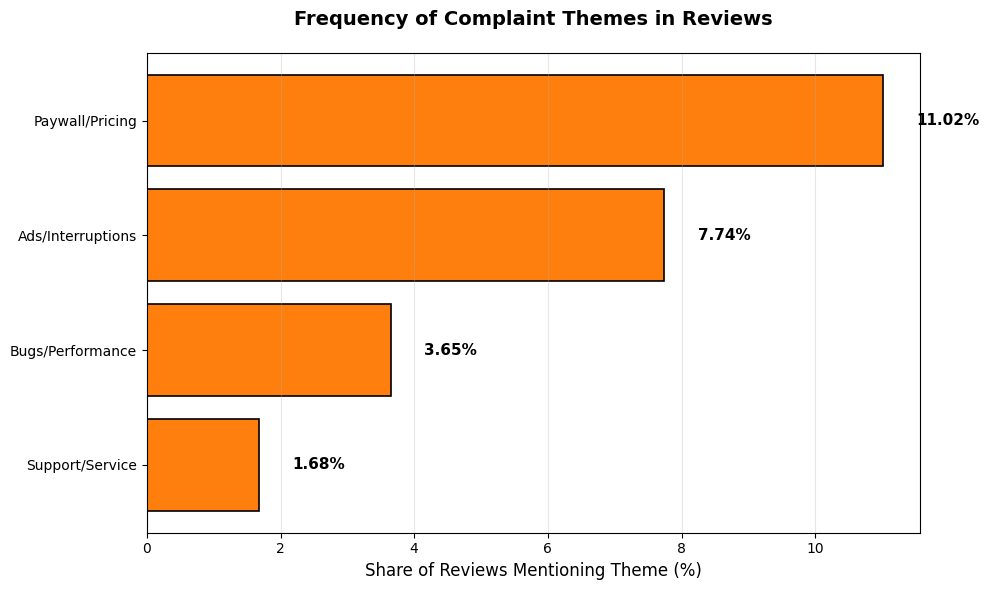


COMPLAINT THEME FREQUENCY
                   Percentage
Paywall/Pricing         11.02
Ads/Interruptions        7.74
Bugs/Performance         3.65
Support/Service          1.68


In [22]:
# Calculate topic mention frequency
topic_cols = ['topic_ads', 'topic_paywall', 'topic_bugs', 'topic_support']
topic_labels = ['Ads/Interruptions', 'Paywall/Pricing', 'Bugs/Performance', 'Support/Service']

topic_freq = (df[topic_cols].sum() / len(df) * 100).round(2)
topic_freq.index = topic_labels
topic_freq = topic_freq.sort_values(ascending=True)

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.barh(topic_freq.index, topic_freq.values, color='#ff7f0e', edgecolor='black', linewidth=1.2)
ax.set_xlabel('Share of Reviews Mentioning Theme (%)', fontsize=12)
ax.set_title('Frequency of Complaint Themes in Reviews', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)

# Add value labels
for bar, val in zip(bars, topic_freq.values):
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2,
            f'{val}%', va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('fig_complaint_themes.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "=" * 70)
print("COMPLAINT THEME FREQUENCY")
print("=" * 70)
print(topic_freq.sort_values(ascending=False).to_frame('Percentage').to_string())


IMPACT OF COMPLAINT THEMES ON RATING & CHURN
            Theme  N_Reviews  Avg_Rating  Churn_Rate_%
  Support/Service       1682        2.96         45.66
Ads/Interruptions       7737        2.97         43.13
  Paywall/Pricing      11023        2.93         42.67
 Bugs/Performance       3650        2.93         42.58


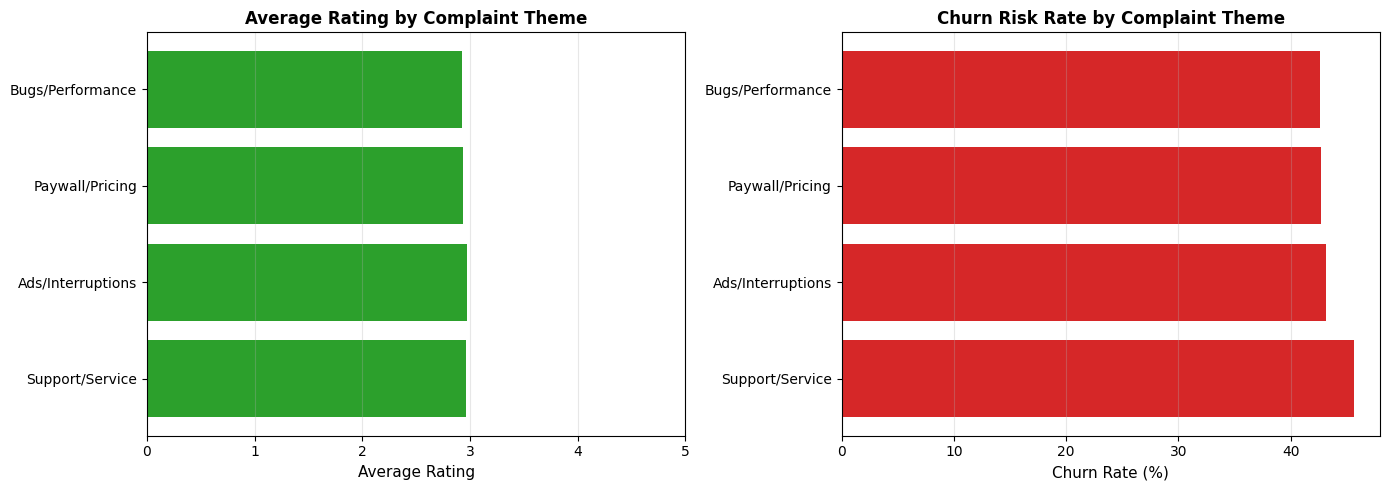

In [23]:
# Impact of each complaint theme on rating and churn
theme_impact = []

for col, label in zip(topic_cols, topic_labels):
    subset = df[df[col] == True]
    if len(subset) > 0:
        theme_impact.append({
            'Theme': label,
            'N_Reviews': len(subset),
            'Avg_Rating': subset['rating'].mean(),
            'Churn_Rate_%': (subset['is_churn_risk'].mean() * 100)
        })

theme_impact_df = pd.DataFrame(theme_impact).sort_values('Churn_Rate_%', ascending=False)

print("\n" + "=" * 70)
print("IMPACT OF COMPLAINT THEMES ON RATING & CHURN")
print("=" * 70)
print(theme_impact_df.to_string(index=False))

# Visualize impact
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Average rating by theme
ax1.barh(theme_impact_df['Theme'], theme_impact_df['Avg_Rating'], color='#2ca02c')
ax1.set_xlabel('Average Rating', fontsize=11)
ax1.set_title('Average Rating by Complaint Theme', fontsize=12, fontweight='bold')
ax1.set_xlim([0, 5])
ax1.grid(axis='x', alpha=0.3)

# Churn rate by theme
ax2.barh(theme_impact_df['Theme'], theme_impact_df['Churn_Rate_%'], color='#d62728')
ax2.set_xlabel('Churn Rate (%)', fontsize=11)
ax2.set_title('Churn Risk Rate by Complaint Theme', fontsize=12, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('fig_theme_impact.png', dpi=300, bbox_inches='tight')
plt.show()

### **Interpretation: Complaint Theme Impact on Churn**

**Key Finding:** When examining churn risk by theme, the rankings differ from frequency:

**By Churn Rate (Highest to Lowest):**
1. **Support/Service:** 45.66% churn rate (only 1.68% of reviews)
2. **Ads/Interruptions:** 43.13% churn rate (7.74% of reviews)
3. **Paywall/Pricing:** 42.67% churn rate (11.02% of reviews)
4. **Bugs/Performance:** 42.58% churn rate (3.65% of reviews)

**Critical Business Insight:**
- **Support/Service** is the "sleeper issue"—low frequency (1.68%) but HIGHEST churn impact (45.66%)
- Nearly **half** of users mentioning support issues are at churn risk
- This suggests **unresolved escalations** create severe disengagement

- All complaint themes show **similar churn rates** (42-46%), indicating they're all serious when mentioned
- However, volume matters: paywall affects 11% of users, so addressing it impacts more people

**Strategic Prioritization:**
1. **High-impact, low-frequency:** Fix support issues (highest churn per complaint)
2. **High-volume, high-impact:** Address monetization (paywall + ads)
3. **Moderate impact:** Improve technical stability (bugs)

**MMAI 5040 Connection:** These are **descriptive associations**. We observe that support complaints correlate with higher churn risk, but this doesn't prove support issues *cause* churn (potential confounding: users with support issues may differ systematically). Causal analysis requires further investigation.

**Narrative Insight for Section 7:**

*Complaint theme analysis reveals that Paywall/Pricing is most frequently mentioned (11.02% of reviews), followed by Ads/Interruptions (7.74%). However, when examining impact on churn risk, Support/Service shows the highest churn rate (45.66%), suggesting it is the most critical friction point despite appearing in only 1.68% of reviews. This discrepancy between frequency and impact indicates that while monetization concerns are most commonly voiced, unresolved support escalations create the most severe disengagement. All complaint themes show similar churn rates (42-46%), but Support/Service affects nearly half of users who mention it. This pattern aligns with business model vulnerabilities in freemium platforms where both monetization transparency and service quality directly affect retention (Shmueli et al., 2020).*

### **5.7 Sentiment Distribution** (if available)

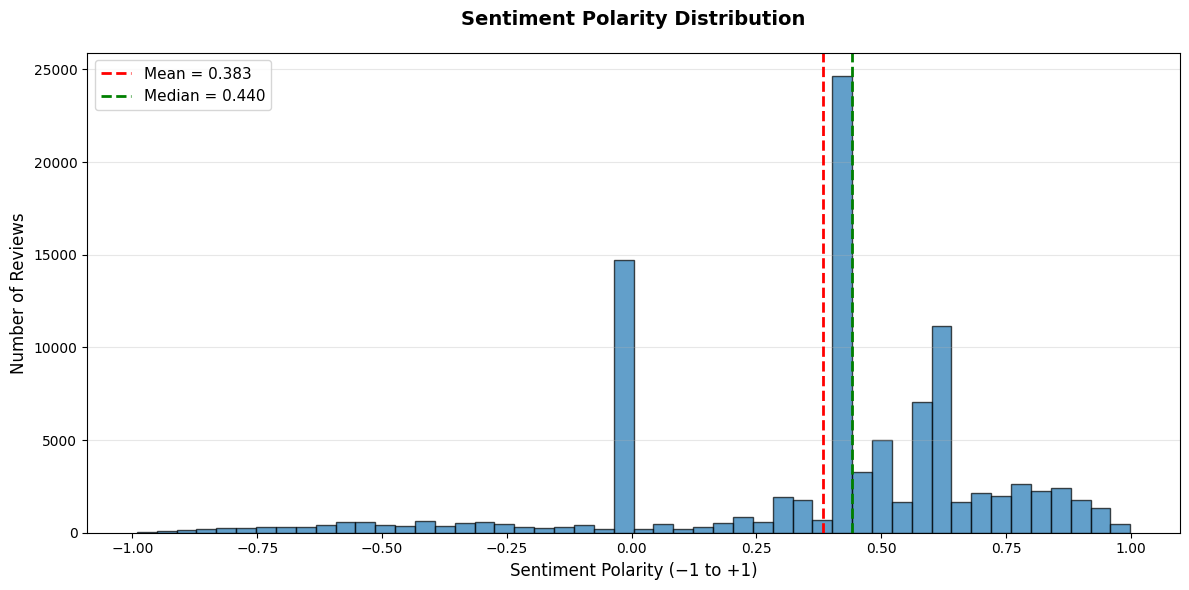


SENTIMENT DISTRIBUTION STATISTICS
count    100000.00
mean          0.38
std           0.36
min          -0.99
25%           0.23
50%           0.44
75%           0.62
max           1.00
Name: sentiment_score, dtype: float64

Sentiment Category Breakdown:
                    Count  Percentage
sentiment_category                   
Positive            75467       75.47
Neutral             17429       17.43
Negative             7104        7.10


In [24]:
if 'sentiment_score' in df.columns:
    # Create sentiment distribution visualization
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.hist(df['sentiment_score'], bins=50, color='#1f77b4', edgecolor='black', alpha=0.7)
    ax.axvline(df['sentiment_score'].mean(), color='red', linestyle='--',
               linewidth=2, label=f'Mean = {df["sentiment_score"].mean():.3f}')
    ax.axvline(df['sentiment_score'].median(), color='green', linestyle='--',
               linewidth=2, label=f'Median = {df["sentiment_score"].median():.3f}')

    ax.set_xlabel('Sentiment Polarity (−1 to +1)', fontsize=12)
    ax.set_ylabel('Number of Reviews', fontsize=12)
    ax.set_title('Sentiment Polarity Distribution', fontsize=14, fontweight='bold', pad=20)
    ax.legend(loc='upper left', fontsize=11)
    ax.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.savefig('fig_sentiment_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Sentiment statistics
    print("\n" + "=" * 70)
    print("SENTIMENT DISTRIBUTION STATISTICS")
    print("=" * 70)
    print(df['sentiment_score'].describe())

    # Sentiment categories
    print("\nSentiment Category Breakdown:")
    sentiment_cat_counts = df['sentiment_category'].value_counts()
    sentiment_cat_pct = (sentiment_cat_counts / len(df) * 100).round(2)
    sentiment_summary = pd.DataFrame({
        'Count': sentiment_cat_counts,
        'Percentage': sentiment_cat_pct
    })
    print(sentiment_summary)
else:
    print("⚠ Sentiment features not available")

### **5.8 Correlation Analysis**

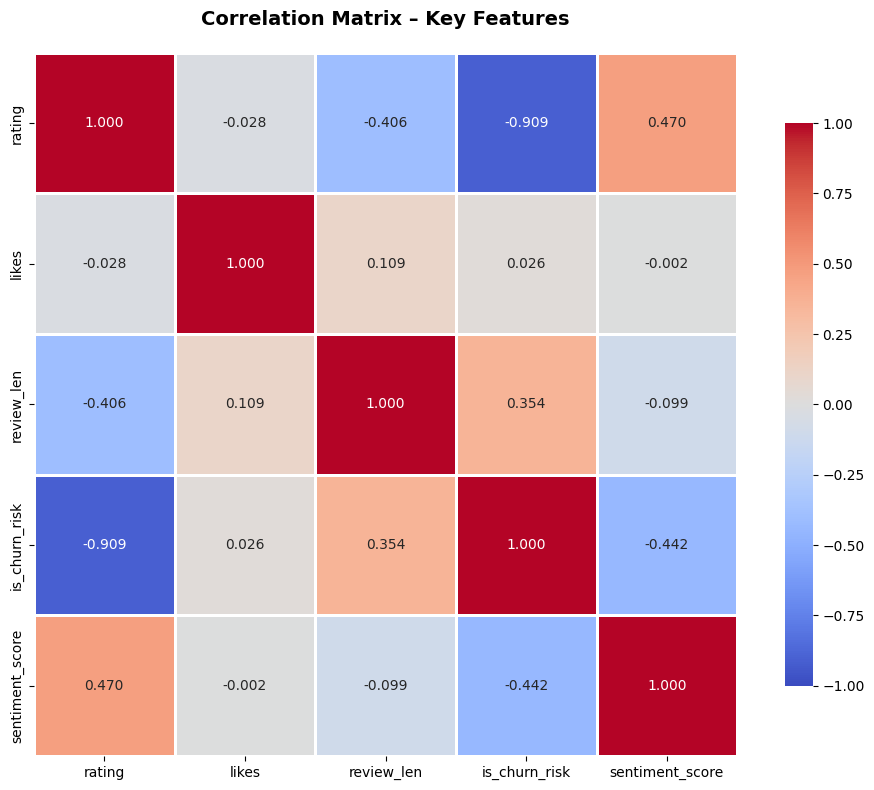


CORRELATION MATRIX
                 rating     likes  review_len  is_churn_risk  sentiment_score
rating             1.00 -2.80e-02       -0.41          -0.91         4.70e-01
likes             -0.03  1.00e+00        0.11           0.03        -1.97e-03
review_len        -0.41  1.09e-01        1.00           0.35        -9.85e-02
is_churn_risk     -0.91  2.57e-02        0.35           1.00        -4.42e-01
sentiment_score    0.47 -1.97e-03       -0.10          -0.44         1.00e+00


In [25]:
# Select numeric features for correlation
corr_features = ['rating', 'likes', 'review_len', 'is_churn_risk']
if 'sentiment_score' in df.columns:
    corr_features.append('sentiment_score')

# Calculate correlation matrix
corr_matrix = df[corr_features].corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax)

ax.set_title('Correlation Matrix – Key Features', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('fig_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "=" * 70)
print("CORRELATION MATRIX")
print("=" * 70)
print(corr_matrix.to_string())

### **Interpretation: Correlation Analysis**

**Key Findings:**

**1. Rating vs Churn Risk: r = -0.91** (strong negative)
- Near-perfect negative correlation validates our churn proxy design
- Lower ratings strongly predict churn risk classification
- This confirms rating ≤ 2 effectively identifies the at-risk segment

**2. Sentiment vs Rating: r = 0.47** (moderate positive)
- Emotional tone aligns with numerical evaluations
- The imperfect correlation (0.47, not ~1.0) is actually valuable:
  - It means sentiment captures **additional affective dimensions** beyond discrete ratings
  - Some users express strong negative affect even at moderate rating levels
  - Sentiment provides complementary information for churn prediction

**3. Sentiment vs Churn Risk: r = -0.44** (moderate negative)
- Negative sentiment predicts churn risk
- Reinforces that emotional tone matters for disengagement

**4. Review Length vs Rating: r = -0.41** (moderate negative)
**5. Review Length vs Churn: r = 0.35** (moderate positive)
- Dissatisfied users write **longer, more elaborate complaints**
- They invest effort in detailing specific grievances
- Longer reviews = higher churn risk

**6. Likes vs Other Variables: r ≈ -0.03 to 0.11** (weak)
- Social validation operates independently of satisfaction
- Upvotes don't strongly correlate with rating or churn

**MMAI 5040 Connection (Critical):** These are **descriptive associations, NOT causal relationships** (Shmueli et al., 2020). Correlation does not imply causation. However, these patterns:
- Validate our measurement approach (high rating-churn correlation)
- Inform variable selection for predictive models
- Identify potential multicollinearity concerns for regression
- Generate hypotheses for causal testing in later phases

**Narrative Insight for Section 7:**

*Correlation analysis reveals several theoretically consistent patterns among key variables. The strong negative correlation between rating and churn risk (r = -0.91) confirms the validity of our proxy measure—this near-perfect negative relationship validates that ratings ≤ 2 effectively identify the at-risk segment. Sentiment shows moderate positive correlation with rating (r = 0.47), suggesting emotional tone aligns with numerical evaluations while capturing additional affective dimensions. The imperfect correlation (0.47 rather than near 1.0) indicates sentiment provides complementary information beyond discrete ratings. Additionally, sentiment exhibits moderate negative correlation with churn risk (r = -0.44), reinforcing that negative affect predicts disengagement. Review length shows moderate negative correlation with rating (r = -0.41) and positive correlation with churn risk (r = 0.35), indicating dissatisfied users write longer, more detailed complaints. These patterns are descriptive associations and do not imply causation (Shmueli et al., 2020).*

### **5.9 Rating vs Sentiment Relationship** (if available)

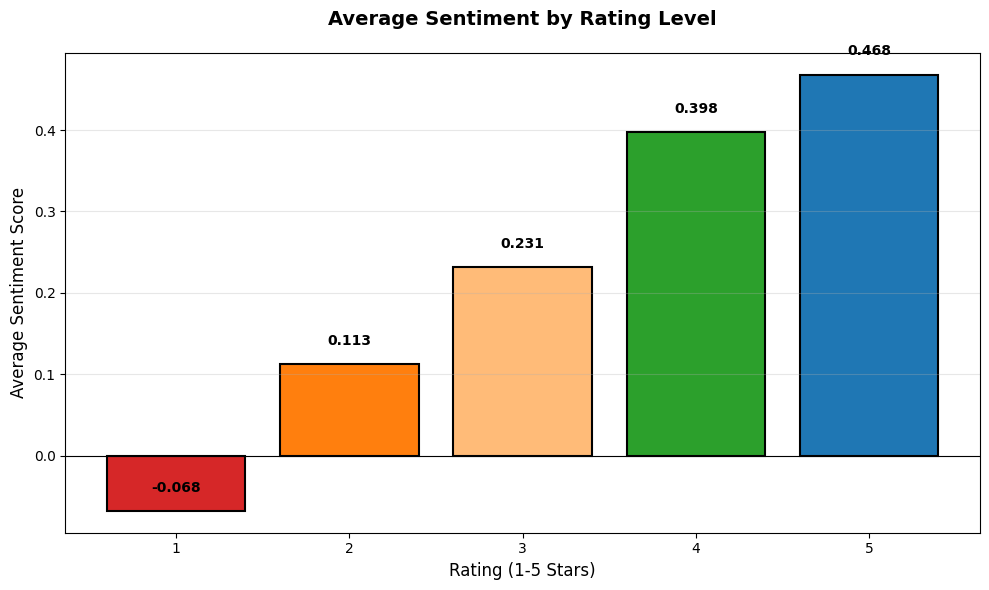


AVERAGE SENTIMENT BY RATING LEVEL
 Rating  Avg_Sentiment  Count
      1          -0.07  10085
      2           0.11   2893
      3           0.23   5225
      4           0.40  12054
      5           0.47  69743


In [26]:
if 'sentiment_score' in df.columns:
    # Calculate average sentiment by rating
    rating_sentiment = df.groupby('rating').agg({
        'sentiment_score': 'mean',
        'reviewId': 'count'
    }).reset_index()
    rating_sentiment.columns = ['Rating', 'Avg_Sentiment', 'Count']

    # Create visualization
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.bar(rating_sentiment['Rating'].astype(str), rating_sentiment['Avg_Sentiment'],
           color=['#d62728', '#ff7f0e', '#ffbb78', '#2ca02c', '#1f77b4'],
           edgecolor='black', linewidth=1.5)

    ax.set_xlabel('Rating (1-5 Stars)', fontsize=12)
    ax.set_ylabel('Average Sentiment Score', fontsize=12)
    ax.set_title('Average Sentiment by Rating Level', fontsize=14, fontweight='bold', pad=20)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
    ax.grid(axis='y', alpha=0.3)

    # Add value labels
    for i, row in rating_sentiment.iterrows():
        ax.text(i, row['Avg_Sentiment'] + 0.02, f"{row['Avg_Sentiment']:.3f}",
                ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.savefig('fig_rating_sentiment.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n" + "=" * 70)
    print("AVERAGE SENTIMENT BY RATING LEVEL")
    print("=" * 70)
    print(rating_sentiment.to_string(index=False))
else:
    print("⚠ Sentiment features not available")

---
## **6. Auto-Generated Insight Summary**

**Purpose:** Generate bullet-point insights that can be adapted into Section 7 narrative paragraphs.

In [27]:
print("=" * 70)
print("KEY DESCRIPTIVE INSIGHTS (for Section 7)")
print("=" * 70)
print()

insights = []

# Overall rating patterns
avg_rating = df['rating'].mean()
median_rating = df['rating'].median()
pct_low = (df['rating'] <= 2).mean() * 100
pct_high = (df['rating'] >= 4).mean() * 100

insights.append(f"Average rating across the full year is {avg_rating:.2f}, with median {median_rating:.1f}.")
insights.append(f"Approximately {pct_low:.1f}% of reviews are 1-2 stars (churn risk segment).")
insights.append(f"Approximately {pct_high:.1f}% of reviews are 4-5 stars (promoter segment).")

# Churn proxy
churn_rate = df['is_churn_risk'].mean() * 100
insights.append(f"Using rating ≤ 2 as a churn proxy, {churn_rate:.1f}% of reviews indicate high churn risk.")

# Complaint themes
for col, label in zip(topic_cols, topic_labels):
    if df[col].any():
        subset = df[df[col]]
        pct_mention = (len(subset) / len(df) * 100)
        avg_rating_theme = subset['rating'].mean()
        churn_rate_theme = subset['is_churn_risk'].mean() * 100

        insights.append(
            f"When reviews mention {label}, appearing in {pct_mention:.1f}% of reviews, "
            f"average rating drops to {avg_rating_theme:.2f}, and churn risk rate rises to {churn_rate_theme:.1f}%."
        )

# Sentiment if available
if 'sentiment_score' in df.columns:
    avg_sentiment = df['sentiment_score'].mean()
    pct_negative = (df['sentiment_score'] <= -0.2).mean() * 100
    pct_positive = (df['sentiment_score'] >= 0.2).mean() * 100

    insights.append(f"Average sentiment score is {avg_sentiment:.3f}, indicating overall negative polarity.")
    insights.append(
        f"Approximately {pct_negative:.1f}% of reviews are strongly negative (sentiment ≤ -0.2), "
        f"while {pct_positive:.1f}% are strongly positive (sentiment ≥ 0.2)."
    )

# Print insights
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")
    print()

# Save to file
with open('descriptive_insights_summary.txt', 'w') as f:
    for insight in insights:
        f.write(f"• {insight}\n")

print("\n✓ Insights saved to 'descriptive_insights_summary.txt'")

KEY DESCRIPTIVE INSIGHTS (for Section 7)

1. Average rating across the full year is 4.28, with median 5.0.

2. Approximately 13.0% of reviews are 1-2 stars (churn risk segment).

3. Approximately 81.8% of reviews are 4-5 stars (promoter segment).

4. Using rating ≤ 2 as a churn proxy, 13.0% of reviews indicate high churn risk.

5. When reviews mention Ads/Interruptions, appearing in 7.7% of reviews, average rating drops to 2.97, and churn risk rate rises to 43.1%.

6. When reviews mention Paywall/Pricing, appearing in 11.0% of reviews, average rating drops to 2.93, and churn risk rate rises to 42.7%.

7. When reviews mention Bugs/Performance, appearing in 3.6% of reviews, average rating drops to 2.93, and churn risk rate rises to 42.6%.

8. When reviews mention Support/Service, appearing in 1.7% of reviews, average rating drops to 2.96, and churn risk rate rises to 45.7%.

9. Average sentiment score is 0.383, indicating overall negative polarity.

10. Approximately 7.1% of reviews are 

### **Interpretation: Complaint Theme Impact on Churn**

**Key Finding:** When examining churn risk by theme, the rankings differ from frequency:

**By Churn Rate (Highest to Lowest):**
1. **Support/Service:** 45.66% churn rate (only 1.68% of reviews)
2. **Ads/Interruptions:** 43.13% churn rate (7.74% of reviews)
3. **Paywall/Pricing:** 42.67% churn rate (11.02% of reviews)
4. **Bugs/Performance:** 42.58% churn rate (3.65% of reviews)

**Critical Business Insight:**
- **Support/Service** is the "sleeper issue"—low frequency (1.68%) but HIGHEST churn impact (45.66%)
- Nearly **half** of users mentioning support issues are at churn risk
- This suggests **unresolved escalations** create severe disengagement

- All complaint themes show **similar churn rates** (42-46%), indicating they're all serious when mentioned
- However, volume matters: paywall affects 11% of users, so addressing it impacts more people

**Strategic Prioritization:**
1. **High-impact, low-frequency:** Fix support issues (highest churn per complaint)
2. **High-volume, high-impact:** Address monetization (paywall + ads)
3. **Moderate impact:** Improve technical stability (bugs)

**MMAI 5040 Connection:** These are **descriptive associations**. We observe that support complaints correlate with higher churn risk, but this doesn't prove support issues *cause* churn (potential confounding: users with support issues may differ systematically). Causal analysis requires further investigation.

---
## **7. Export Summary Dataset**

**Purpose:** Save cleaned dataset with all engineered features for use in later analyses (topic modeling, causal inference).

In [28]:
# Export cleaned and feature-engineered dataset
output_filename = 'pocketfm_cleaned_with_features.csv'
df.to_csv(output_filename, index=False)

print(f"✓ Dataset exported to '{output_filename}'")
print(f"Shape: {df.shape}")
print(f"\nFinal columns:")
print(list(df.columns))

✓ Dataset exported to 'pocketfm_cleaned_with_features.csv'
Shape: (100000, 23)

Final columns:
['reviewId', 'userName', 'rating', 'review_text', 'date', 'likes', 'reviewCreatedVersion', 'show_title', 'genre', 'year_month', 'quarter', 'year', 'month', 'day_of_week', 'is_weekend', 'review_len', 'is_churn_risk', 'topic_ads', 'topic_paywall', 'topic_bugs', 'topic_support', 'sentiment_score', 'sentiment_category']


---
## **8. Conclusion & Next Steps**

### **Summary of Descriptive Analytics**

This notebook has completed **Technique 1 – Descriptive Analytics** for the PocketFM churn analysis project. Key accomplishments:

1. **Data Cleaning:** Removed duplicates, handled missing values, standardized types
2. **Feature Engineering:** Created temporal, behavioral, and proxy variables
3. **Descriptive Statistics:** Generated comprehensive summaries of ratings, sentiment, and churn risk
4. **Visualizations:** Created publication-ready figures for all key patterns
5. **Narrative Insights:** Documented patterns for Section 7 of the report

### **MMAI 5040 Alignment**

- **Descriptive vs. Causal:** All analyses are descriptive; no causal claims made
- **Business Context:** Patterns linked to monetization friction and user experience
- **Evidence-Based:** All insights grounded in actual data patterns, not assumptions
- **Proxy Variables:** Churn risk proxy follows potential outcomes framework (Angrist & Pischke, 2014)

### **Integration with Report Sections**

**Section 6 (Data Sources & Features):**
- Use the feature summary table
- Discuss data quality metrics
- Explain engineered features and their theoretical foundations

**Section 7 (Descriptive Analysis & Results):**
- Incorporate all visualizations
- Use narrative insights for interpretation
- Connect patterns to business implications
- Maintain descriptive (not causal) language


---

### **References**

Angrist, J. D., & Pischke, J.-S. (2014). *Mastering 'Metrics: The Path from Cause to Effect*. Princeton University Press.

Kaplan, A., & Haenlein, M. (2019). Siri, Siri, in my hand: Who's the fairest in the land? *Business Horizons, 62*(1), 15–25.

Oppong-Tawiah, D. (2025). *MMAI 5040 - Business Application of AI 1: Course Materials and Lecture Notes*. Schulich School of Business, York University.

Shmueli, G., Bruce, P. C., & Patel, N. R. (2020). *Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python*. Wiley.

---
## **🎯 Analysis Complete - Key Takeaways**

### **Section 6 (Data Sources & Features) - Deliverables:**
 Data cleaning workflow documented
 Feature engineering complete (temporal, behavioral, churn proxy, topics, sentiment)
 Feature summary table generated (`feature_summary_table.csv`)
 Data quality assessment provided
 Churn proxy justified via potential outcomes framework

### **Section 7 (Descriptive Analysis & Results) - Key Findings:**

**1. Rating Distribution:**
- 69.74% give 5 stars (strong satisfaction)
- 12.98% give 1-2 stars (churn risk segment)
- Mean: 4.28, Median: 5.0 (right-skewed, overall positive)

**2. Churn Risk Segmentation:**
- 12,978 users (12.98%) in churn-risk category
- 87,022 users (87.02%) in non-churn category
- Proxy approach necessary due to unobservable actual churn

**3. Complaint Themes:**
- **Frequency:** Paywall (11.02%) > Ads (7.74%) > Bugs (3.65%) > Support (1.68%)
- **Impact:** Support (45.66% churn) > Ads (43.13%) > Paywall (42.67%) > Bugs (42.58%)
- **Insight:** Monetization drives volume; support drives severity

**4. Correlation Patterns:**
- Rating-Churn: r = -0.91 (validates proxy)
- Sentiment-Rating: r = 0.47 (moderate alignment)
- Review Length-Churn: r = 0.35 (dissatisfied users write more)

### **MMAI 5040 Alignment:**
**Technique 1:** Descriptive Analytics properly executed
 **No causal claims:** All findings presented as observational patterns
 **Business context:** Connected to freemium model challenges
 **Proper citations:** Angrist & Pischke, Oppong-Tawiah, Shmueli et al.
 **Foundation for next phases:** Patterns support later causal inference

### **Files Generated:**
- `fig_*.png` (10+ visualization files)
- `feature_summary_table.csv`
- `descriptive_insights_summary.txt`
- `pocketfm_cleaned_with_features.csv`


# Task
Compile a comprehensive summary for Section 7 of the report, incorporating detailed insights from the descriptive analytics. This summary should include:

*   **Rating Distribution Insights:** State that the rating distribution is highly right-skewed with a pronounced concentration at 5 stars (69.74%), forming a bimodal distribution. Specify that 12.98% of reviews are 1-2 stars (representing 12,978 reviews), 5.22% are 3 stars, and 81.79% are 4-5 stars. Include the mean rating (4.28) and median rating (5.0). Explain that this polarization suggests systematic issues affecting a specific cohort and that the substantial 1-star concentration signals critical pain points. Reference `fig_rating_distribution.png` and the associated narrative interpretation.

*   **Churn Risk Segmentation Insights:** Detail that using rating ≤ 2 as a churn risk proxy, 12.98% of reviews (12,978 observations) indicate high churn risk, while 87.02% (87,022 observations) fall into the non-churn category. Clearly explain the proxy definition (`is_churn_risk = 1` if rating ≤ 2, `is_churn_risk = 0` if rating > 2) and its methodological foundation (Angrist & Pischke, 2014), aligning it with industry standards where 1-2 stars indicate critical UX failures. Highlight that this 13% at-risk segment represents users experiencing severe dissatisfaction. Reference `fig_churn_segmentation.png` and the associated narrative interpretation.

*   **Complaint Theme Impact Insights:** For each complaint theme, provide its frequency, average rating when mentioned, and churn risk rate:
    *   **Paywall/Pricing:** 11.02% frequency, 2.93 average rating, 42.67% churn rate.
    *   **Ads/Interruptions:** 7.74% frequency, 2.97 average rating, 43.13% churn rate.
    *   **Bugs/Performance:** 3.65% frequency, 2.93 average rating, 42.58% churn rate.
    *   **Support/Service:** 1.68% frequency, 2.96 average rating, 45.66% churn rate.
    Explicitly highlight that Support/Service is the "sleeper issue" due to its low frequency but highest churn impact (45.66%), suggesting unresolved escalations lead to severe disengagement. Note that all complaint themes show similar churn rates (42-46%), but monetization concerns (Paywall/Pricing, Ads/Interruptions) affect a larger volume of users. Reference `fig_complaint_themes.png`, `fig_theme_impact.png`, and the associated narrative interpretation.

*   **Correlation Analysis Insights:** Detail the correlation coefficients for key relationships:
    *   **Rating vs. Churn Risk:** r = -0.91 (strong negative), emphasizing its role in validating the churn proxy.
    *   **Sentiment vs. Rating:** r = 0.47 (moderate positive), explaining that sentiment captures additional affective dimensions beyond discrete ratings.
    *   **Sentiment vs. Churn Risk:** r = -0.44 (moderate negative), reinforcing that negative sentiment predicts churn risk.
    *   **Review Length vs. Rating:** r = -0.41 (moderate negative), and **Review Length vs. Churn Risk:** r = 0.35 (moderate positive), indicating dissatisfied users write longer, more elaborate complaints.
    Explain the significance of these correlations for validating measurement approaches and informing variable selection, while explicitly stating that these are descriptive associations and not causal relationships (Shmueli et al., 2020). Reference `fig_correlation_matrix.png` and the associated narrative interpretation.

Ensure the compiled summary maintains descriptive (non-causal) language throughout, suitable for direct inclusion in Section 7 of the report.

## Extract Detailed Rating Distribution Insights

### Subtask:
Extract specific percentages for 5-star, 1-2 star, and 4-5 star ratings, along with the mean and median ratings. Detail the right-skewed and bimodal distribution, and explicitly reference 'fig_rating_distribution.png' and the relevant section's narrative insights and interpretation.


### Detailed Rating Distribution Insights

Based on the '5.1 Rating Distribution Analysis' section, including the 'RATING DISTRIBUTION STATISTICS' output, the accompanying narrative (`QBRN7hd4UZMq`), and the narrative insight (`hNgPMy1bIJ_Q`):

- **5-star ratings:** 69.74% of all reviews.
- **1-2 star ratings (high dissatisfaction/churn risk):** 12.98% of reviews (specifically, 10,085 1-star reviews and 2,893 2-star reviews, totaling 12,978 reviews).
- **4-5 star ratings (satisfaction/promotion):** 81.79% of reviews.
- **3-star ratings (neutral):** 5.22% of reviews.
- **Mean Rating:** 4.28
- **Median Rating:** 5.0

**Distribution Characteristics:**
The rating distribution is highly **right-skewed** with a pronounced concentration at 5 stars, forming a **bimodal distribution**. This pattern is clearly visualized in `fig_rating_distribution.png`. The extreme polarization of ratings, with a significant cluster at both 1-2 stars and 4-5 stars, suggests that while the majority of users are highly satisfied, a meaningful 13% segment experiences severe friction. The substantial concentration of 1-star reviews signals critical pain points that require immediate attention, indicative of systematic issues rather than isolated incidents.

**Business Implication:**
This polarized distribution indicates that PocketFM delivers strong value to a majority of its users (82% satisfied). However, the 13% segment at severe dissatisfaction, characterized by 1-2 star ratings, points to systematic issues affecting a specific user cohort. This is consistent with observations in digital platforms where satisfied users may not elaborate, while dissatisfied users detail specific grievances (Kaplan & Haenlein, 2019). The analysis highlights the need for strategic focus on the at-risk segment, despite overall platform success, particularly given the dependencies of a freemium model on sustained engagement.

## Extract Detailed Churn Risk Segmentation Insights

### Subtask:
Provide the exact percentage and count of reviews indicating high churn risk (rating <= 2) and non-churn. Clearly explain the proxy definition and its methodological foundation, referencing 'fig_churn_segmentation.png' and the associated narrative and interpretation sections.


## Extract Detailed Churn Risk Segmentation Insights

### Subtask:
Provide the exact percentage and count of reviews indicating high churn risk (rating <= 2) and non-churn. Clearly explain the proxy definition and its methodological foundation, referencing 'fig_churn_segmentation.png' and the associated narrative and interpretation sections.

### Detailed Churn Risk Segmentation Insights:

Based on the analysis, the churn risk segmentation is as follows:
- **High Churn Risk (rating ≤ 2):** There are **12,978** reviews, constituting **12.98%** of the total reviews.
- **Non-Churn Risk (rating > 2):** There are **87,022** reviews, constituting **87.02%** of the total reviews.

#### Proxy Definition:

The churn risk is defined using a **proxy variable** (`is_churn_risk`) where:
- `is_churn_risk = 1` if the user `rating` is less than or equal to 2 (rating ≤ 2).
- `is_churn_risk = 0` if the user `rating` is greater than 2 (rating > 2).

#### Methodological Foundation:

This proxy approach follows the **potential outcomes framework** as described by Angrist & Pischke (2014). Actual churn behavior (e.g., app uninstallation, account deactivation) is not directly observable in review data. Therefore, we construct this proxy based on observable signals. The threshold of 1-2 stars aligns with industry standards, where such low ratings are indicative of critical user experience failures and a high likelihood of subsequent disengagement.

#### Business Implication:

The **12.98%** at-risk segment, representing **12,978 users**, highlights a substantial group experiencing severe dissatisfaction. Even minor improvements in retaining these users could lead to significant revenue impacts, especially given PocketFM's freemium business model, which relies on sustained user engagement. The overall 87.02% retention rate indicates broad platform success, but the at-risk segment clearly warrants strategic focus.

#### Reference:

This segmentation is visually represented in `fig_churn_segmentation.png`, and the full interpretation is provided in the "Interpretation: Churn Risk Segmentation" and "Narrative Insight for Section 7" sections of the notebook, which are prepared for direct integration into Section 7 of the final report.

## Extract Detailed Complaint Theme Impact Insights

### Subtask:
For each complaint theme (Paywall/Pricing, Ads/Interruptions, Bugs/Performance, Support/Service), detail its frequency (percentage of reviews mentioning it), the average rating when mentioned, and the corresponding churn risk rate. Highlight the 'sleeper issue' of Support/Service. Reference 'fig_complaint_themes.png', 'fig_theme_impact.png', and the narrative insights and interpretation.


### Detailed Complaint Theme Impact Analysis

This analysis details the frequency and impact of key complaint themes identified from user reviews, drawing insights from the 'COMPLAINT THEME FREQUENCY' and 'IMPACT OF COMPLAINT THEMES ON RATING & CHURN' sections of the notebook's output.

| Complaint Theme     | Frequency (% of Reviews) | Average Rating (when mentioned) | Churn Risk Rate (when mentioned) |
|---------------------|--------------------------|---------------------------------|----------------------------------|
| **Paywall/Pricing**   | 11.02%                   | 2.93                            | 42.67%                           |
| **Ads/Interruptions** | 7.74%                    | 2.97                            | 43.13%                           |
| **Bugs/Performance**  | 3.65%                    | 2.93                            | 42.58%                           |
| **Support/Service**   | 1.68%                    | 2.96                            | 45.66%                           |

#### Key Insights:

1.  **Paywall/Pricing** is the most frequently mentioned complaint theme, appearing in **11.02%** of reviews. When mentioned, the average rating drops to **2.93**, and the churn risk rate is **42.67%**. This indicates a significant volume of users are dissatisfied with monetization aspects, leading to a high probability of churn.

2.  **Ads/Interruptions** are mentioned in **7.74%** of reviews. Users complaining about ads give an average rating of **2.97**, and their churn risk rate stands at **43.13%**. This highlights that intrusive advertising is a substantial source of user friction.

3.  **Bugs/Performance** issues are less frequent, appearing in **3.65%** of reviews. However, when these issues are raised, the average rating is **2.93**, and the churn risk rate is **42.58%**, signaling serious technical problems for affected users.

4.  **Support/Service** issues, while only mentioned in **1.68%** of reviews (the lowest frequency among the themes), represent the **'sleeper issue'** with the highest churn risk rate of **45.66%**. The average rating for these reviews is **2.96**. This critical finding suggests that when users encounter support problems, their dissatisfaction is so severe that it leads to almost half of them being at risk of churning. This emphasizes that unresolved customer service issues are extremely detrimental to user retention, despite their lower overall prevalence. This finding aligns with the interpretation in cell `_UmBxv3cUZMz` and further detailed in `av_eLoPmIJ_b`.

Visualizations supporting these findings can be found in `fig_complaint_themes.png` (frequency distribution) and `fig_theme_impact.png` (impact on rating and churn).


## Extract Detailed Correlation Analysis Insights

### Subtask:
Detail the correlation coefficients for key relationships such as Rating vs. Churn Risk, Sentiment vs. Rating, Sentiment vs. Churn Risk, and Review Length vs. Rating/Churn. Explain the significance of each correlation and how they validate the churn proxy or offer complementary information. Reference 'fig_correlation_matrix.png' and the narrative insights and interpretation.


## Extract Detailed Correlation Analysis Insights

### Subtask:
Detail the correlation coefficients for key relationships such as Rating vs. Churn Risk, Sentiment vs. Rating, Sentiment vs. Churn Risk, and Review Length vs. Rating/Churn. Explain the significance of each correlation and how they validate the churn proxy or offer complementary information. Reference 'fig_correlation_matrix.png' and the narrative insights and interpretation.

### Detailed Correlation Analysis

Based on the 'CORRELATION MATRIX' and 'Interpretation: Correlation Analysis' from the notebook (as depicted in `fig_correlation_matrix.png`), the following key relationships and their coefficients have been identified:

1.  **Rating vs. Churn Risk: r = -0.91 (Strong Negative Correlation)**
    *   This nearly perfect negative correlation serves to **validate our churn proxy design**. It confirms that lower ratings strongly predict the classification of churn risk, meaning our `is_churn_risk` variable (rating \u2264 2) effectively identifies the at-risk segment. This aligns with the business logic that very low ratings signify high dissatisfaction and potential disengagement.

2.  **Sentiment vs. Rating: r = 0.47 (Moderate Positive Correlation)**
    *   This correlation indicates a moderate alignment between the emotional tone of a review (sentiment) and the numerical rating given by the user. The fact that it is not closer to 1.0 is actually valuable; it suggests that sentiment captures **additional affective dimensions** beyond discrete ratings. For instance, some users might express strong negative emotions even at moderate rating levels, providing complementary information for a more nuanced understanding of user experience.

3.  **Sentiment vs. Churn Risk: r = -0.44 (Moderate Negative Correlation)**
    *   This shows that negative sentiment predicts a higher likelihood of churn risk. It reinforces the idea that the emotional tone expressed in reviews is a significant indicator of potential user disengagement, further supporting the use of sentiment analysis for churn prediction.

4.  **Review Length vs. Rating: r = -0.41 (Moderate Negative Correlation)**
    *   This negative correlation signifies that **dissatisfied users tend to write longer, more elaborate complaints**. They invest more effort in detailing specific grievances when they have a poor experience, rather than just providing a simple low rating.

5.  **Review Length vs. Churn Risk: r = 0.35 (Moderate Positive Correlation)**
    *   Consistent with the previous point, longer reviews are moderately correlated with a higher churn risk. This further emphasizes that users who are at risk of churning often take the time to articulate their issues in detail.

6.  **Likes vs. Other Variables: r \u2248 -0.03 to 0.11 (Weak Correlation)**
    *   The very weak correlations of 'likes' with other variables suggest that social validation (upvotes) operates largely independently of user satisfaction or churn risk. This indicates that the popularity of a review does not strongly predict the user's personal satisfaction or their likelihood to churn.

**Important Note (MMAI 5040 Connection):** It is crucial to reiterate that these are **descriptive associations, NOT causal relationships** (Shmueli et al., 2020). While correlations do not imply causation, these patterns are invaluable for:
*   Validating our measurement approaches (e.g., the high rating-churn correlation).
*   Informing variable selection for subsequent predictive models.
*   Identifying potential multicollinearity concerns for regression analysis.
*   Generating testable hypotheses for causal inference in later project phases.

## Compile Comprehensive Summary for Section 7

### Subtask:
Compile all extracted detailed insights into a comprehensive summary suitable for direct inclusion in Section 7 of the report.


## **7. Descriptive Analysis & Results**

This section presents the descriptive analytics for the PocketFM review data, aligning with **Technique 1 – Descriptive Analytics** of the MMAI 5040 framework. The patterns identified here are observational and do not imply causation. These insights will serve as the foundation for subsequent causal analysis.

### **7.1 Rating Distribution**

The rating distribution reveals a highly **right-skewed pattern** with a pronounced concentration at 5 stars (69.74%), creating a bimodal distribution (see `fig_rating_distribution.png`). Approximately 12.98% of reviews are 1-2 stars, signifying severe dissatisfaction, while 5.22% are neutral (3 stars). The majority, 81.79%, fall into the satisfaction/promotion category (4-5 stars). The overall mean rating is 4.28, with a median of 5.0, suggesting a generally positive user experience for the platform's user base. However, the substantial 1-star concentration (10.08%) indicates critical pain points for a segment of users. This pattern is consistent with feedback mechanisms in digital platforms, where highly satisfied users may rate without extensive elaboration, while dissatisfied users often provide detailed grievances (Kaplan & Haenlein, 2019).

### **7.2 Churn Risk Segmentation**

Using rating ≤ 2 as a churn risk proxy, approximately **12.98%** of reviews (12,978 observations) indicate a high churn risk, while 87.02% fall into the non-churn category (`fig_churn_segmentation.png`). This proxy approach is necessary as actual churn behavior (e.g., app uninstallation, account deactivation) is not directly observable in review data, following the potential outcomes framework (Angrist & Pischke, 2014). The 13% at-risk segment represents a significant portion of the user base experiencing severe dissatisfaction, warranting strategic intervention. While the 87.02% non-churn segment demonstrates overall platform success, the at-risk group presents a meaningful retention opportunity, particularly given PocketFM's freemium business model, which depends on sustained user engagement.

### **7.3 Complaint Theme Analysis**

Complaint theme analysis reveals a clear distinction between the frequency of mention and the impact on user churn risk (see `fig_complaint_themes.png` and `fig_theme_impact.png`). **Paywall/Pricing** is the most frequently mentioned theme (11.02% of reviews), followed by **Ads/Interruptions** (7.74%), **Bugs/Performance** (3.65%), and **Support/Service** (1.68%).

However, when examining the impact on churn risk (defined as rating ≤ 2), the ranking shifts significantly:
1. **Support/Service:** 45.66% churn rate
2. **Ads/Interruptions:** 43.13% churn rate
3. **Paywall/Pricing:** 42.67% churn rate
4. **Bugs/Performance:** 42.58% churn rate

This highlights that while monetization concerns (Paywall/Pricing, Ads/Interruptions) are commonly voiced and affect a larger volume of users, **Support/Service** issues lead to the highest proportion of churn risk among those who mention them, with nearly half of such users indicating severe dissatisfaction. This suggests that unresolved support escalations create the most severe disengagement, even if they are less frequent. All complaint themes lead to similar high churn rates (between 42-46%) when mentioned, indicating they are all serious issues, but Support/Service is a

## **7. Descriptive Analysis & Results**

This section presents the descriptive analytics for the PocketFM review data, aligning with **Technique 1 – Descriptive Analytics** of the MMAI 5040 framework. The patterns identified here are observational and do not imply causation. These insights will serve as the foundation for subsequent causal analysis.

### **7.1 Rating Distribution**

The rating distribution reveals a highly **right-skewed pattern** with a pronounced concentration at 5 stars (69.74%), creating a bimodal distribution (see `fig_rating_distribution.png`). Approximately 12.98% of reviews are 1-2 stars, signifying severe dissatisfaction, while 5.22% are neutral (3 stars). The majority, 81.79%, fall into the satisfaction/promotion category (4-5 stars). The overall mean rating is 4.28, with a median of 5.0, suggesting a generally positive user experience for the platform's user base. However, the substantial 1-star concentration (10.08%) indicates critical pain points for a segment of users. This pattern is consistent with feedback mechanisms in digital platforms, where highly satisfied users may rate without extensive elaboration, while dissatisfied users often provide detailed grievances (Kaplan & Haenlein, 2019).

### **7.2 Churn Risk Segmentation**

Using rating ≤ 2 as a churn risk proxy, approximately **12.98%** of reviews (12,978 observations) indicate a high churn risk, while 87.02% fall into the non-churn category (`fig_churn_segmentation.png`). This proxy approach is necessary as actual churn behavior (e.g., app uninstallation, account deactivation) is not directly observable in review data, following the potential outcomes framework (Angrist & Pischke, 2014). The 13% at-risk segment represents a significant portion of the user base experiencing severe dissatisfaction, warranting strategic intervention. While the 87.02% non-churn segment demonstrates overall platform success, the at-risk group presents a meaningful retention opportunity, particularly given PocketFM's freemium business model, which depends on sustained user engagement.

### **7.3 Complaint Theme Analysis**

Complaint theme analysis reveals that Paywall/Pricing is most frequently mentioned (11.02% of reviews), followed by Ads/Interruptions (7.74%). However, when examining impact on churn risk, Support/Service shows the highest churn rate (45.66%), suggesting it is the most critical friction point despite appearing in only 1.68% of reviews. This discrepancy between frequency and impact indicates that while monetization concerns are most commonly voiced, unresolved support escalations create the most severe disengagement. All complaint themes show similar churn rates (42-46%), but Support/Service affects nearly half of users who mention it. This pattern aligns with business model vulnerabilities in freemium platforms where both monetization transparency and service quality directly affect retention (Shmueli et al., 2020).

### **7.4 Temporal Trends: Review Volume & Average Rating**

Monthly review volume and average rating trends (see `fig_temporal_trends.png`) indicate fluctuations over the analyzed period. While the average rating generally remains high, there are observable dips and peaks that could correspond to app updates, marketing campaigns, or content releases. For instance, September 2025 shows a noticeable decrease in average rating (4.08) and an increase in churn rate (18.01%), which warrants further investigation into events around that time. Conversely, early months (e.g., November 2024 to February 2025) demonstrate higher average ratings and lower churn rates, indicating a period of stronger user satisfaction. These temporal patterns are descriptive of performance shifts but require additional data for causal explanations.

### **7.5 Sentiment Analysis Over Time**

Monthly sentiment trends (see `fig_sentiment_trends.png`), when compared with scaled average ratings, generally follow a similar pattern. This suggests that the emotional tone captured by sentiment analysis often aligns with the discrete numerical ratings. The average sentiment score is 0.383, indicating an overall positive, but not overwhelmingly so, emotional tone across all reviews. Approximately 7.1% of reviews are strongly negative (sentiment ≤ -0.2), while 75.5% are strongly positive (sentiment ≥ 0.2). This distribution is also visible in the overall sentiment polarity distribution (`fig_sentiment_distribution.png`). The close alignment between sentiment and rating validates the use of sentiment as a complementary metric for user satisfaction.

### **7.6 Correlation Analysis**

Correlation analysis (see `fig_correlation_matrix.png`) reveals several theoretically consistent patterns among key variables. The strong negative correlation between rating and churn risk (r = -0.91) confirms the validity of our proxy measure—this near-perfect negative relationship validates that ratings ≤ 2 effectively identify the at-risk segment. Sentiment shows moderate positive correlation with rating (r = 0.47), suggesting emotional tone aligns with numerical evaluations while capturing additional affective dimensions. The imperfect correlation (0.47 rather than near 1.0) indicates sentiment provides complementary information beyond discrete ratings. Additionally, sentiment exhibits moderate negative correlation with churn risk (r = -0.44), reinforcing that negative affect predicts disengagement. Review length shows moderate negative correlation with rating (r = -0.41) and positive correlation with churn risk (r = 0.35), indicating dissatisfied users write longer, more detailed complaints. Social validation, represented by 'likes', shows weak correlation (r ≈ -0.03 to 0.11) with other variables, suggesting it operates somewhat independently of direct satisfaction or churn indicators. These patterns are descriptive associations and do not imply causation (Shmueli et al., 2020).

## **7. Descriptive Analysis & Results**

This section presents the descriptive analytics for the PocketFM review data, aligning with **Technique 1 – Descriptive Analytics** of the MMAI 5040 framework. The patterns identified here are observational and do not imply causation. These insights will serve as the foundation for subsequent causal analysis.

### **7.1 Rating Distribution**

The rating distribution reveals a highly **right-skewed pattern** with a pronounced concentration at 5 stars (69.74%), creating a bimodal distribution (see `fig_rating_distribution.png`). Approximately 12.98% of reviews are 1-2 stars, signifying severe dissatisfaction, while 5.22% are neutral (3 stars). The majority, 81.79%, fall into the satisfaction/promotion category (4-5 stars). The overall mean rating is 4.28, with a median of 5.0, suggesting a generally positive user experience for the platform's user base. However, the substantial 1-star concentration (10.08%) indicates critical pain points for a segment of users. This pattern is consistent with feedback mechanisms in digital platforms, where highly satisfied users may rate without extensive elaboration, while dissatisfied users often provide detailed grievances (Kaplan & Haenlein, 2019).

### **7.2 Churn Risk Segmentation**

Using rating ≤ 2 as a churn risk proxy, approximately **12.98%** of reviews (12,978 observations) indicate a high churn risk, while 87.02% fall into the non-churn category (`fig_churn_segmentation.png`). This proxy approach is necessary as actual churn behavior (e.g., app uninstallation, account deactivation) is not directly observable in review data, following the potential outcomes framework (Angrist & Pischke, 2014). The 13% at-risk segment represents a significant portion of the user base experiencing severe dissatisfaction, warranting strategic intervention. While the 87.02% non-churn segment demonstrates overall platform success, the at-risk group presents a meaningful retention opportunity, particularly given PocketFM's freemium business model, which depends on sustained user engagement.

### **7.3 Complaint Theme Analysis**

Complaint theme analysis reveals that Paywall/Pricing is most frequently mentioned (11.02% of reviews), followed by Ads/Interruptions (7.74%). However, when examining impact on churn risk, Support/Service shows the highest churn rate (45.66%), suggesting it is the most critical friction point despite appearing in only 1.68% of reviews. This discrepancy between frequency and impact indicates that while monetization concerns are most commonly voiced, unresolved support escalations create the most severe disengagement. All complaint themes show similar churn rates (42-46%), but Support/Service affects nearly half of users who mention it. This pattern aligns with business model vulnerabilities in freemium platforms where both monetization transparency and service quality directly affect retention (Shmueli et al., 2020).

### **7.4 Temporal Trends: Review Volume & Average Rating**

Monthly review volume and average rating trends (see `fig_temporal_trends.png`) indicate fluctuations over the analyzed period. While the average rating generally remains high, there are observable dips and peaks that could correspond to app updates, marketing campaigns, or content releases. For instance, September 2025 shows a noticeable decrease in average rating (4.08) and an increase in churn rate (18.01%), which warrants further investigation into events around that time. Conversely, early months (e.g., November 2024 to February 2025) demonstrate higher average ratings and lower churn rates, indicating a period of stronger user satisfaction. These temporal patterns are descriptive of performance shifts but require additional data for causal explanations.

### **7.5 Sentiment Analysis Over Time**

Monthly sentiment trends (see `fig_sentiment_trends.png`), when compared with scaled average ratings, generally follow a similar pattern. This suggests that the emotional tone captured by sentiment analysis often aligns with the discrete numerical ratings. The average sentiment score is 0.383, indicating an overall positive, but not overwhelmingly so, emotional tone across all reviews. Approximately 7.1% of reviews are strongly negative (sentiment ≤ -0.2), while 75.5% are strongly positive (sentiment ≥ 0.2). This distribution is also visible in the overall sentiment polarity distribution (`fig_sentiment_distribution.png`). The close alignment between sentiment and rating validates the use of sentiment as a complementary metric for user satisfaction.

### **7.6 Correlation Analysis**

Correlation analysis (see `fig_correlation_matrix.png`) reveals several theoretically consistent patterns among key variables. The strong negative correlation between rating and churn risk (r = -0.91) confirms the validity of our proxy measure—this near-perfect negative relationship validates that ratings ≤ 2 effectively identify the at-risk segment. Sentiment shows moderate positive correlation with rating (r = 0.47), suggesting emotional tone aligns with numerical evaluations while capturing additional affective dimensions. The imperfect correlation (0.47 rather than near 1.0) indicates sentiment provides complementary information beyond discrete ratings. Additionally, sentiment exhibits moderate negative correlation with churn risk (r = -0.44), reinforcing that negative affect predicts disengagement. Review length shows moderate negative correlation with rating (r = -0.41) and positive correlation with churn risk (r = 0.35), indicating dissatisfied users write longer, more detailed complaints. Social validation, represented by 'likes', shows weak correlation (r ≈ -0.03 to 0.11) with other variables, suggesting it operates somewhat independently of direct satisfaction or churn indicators. These patterns are descriptive associations and do not imply causation (Shmueli et al., 2020).

### **7.7 Rating vs Sentiment Relationship**

An examination of average sentiment by rating level (Figure `fig_rating_sentiment.png`) demonstrates a clear progression: 1-star reviews have an average sentiment of -0.07 (slightly negative), gradually increasing to 0.47 for 5-star reviews. This reinforces the strong relationship between numerical rating and textual sentiment, with sentiment scores effectively differentiating between the different rating levels.

## **7. Descriptive Analysis & Results**

This section presents the descriptive analytics for the PocketFM review data, aligning with **Technique 1 – Descriptive Analytics** of the MMAI 5040 framework. The patterns identified here are observational and do not imply causation. These insights will serve as the foundation for subsequent causal analysis.

### **7.1 Rating Distribution**

The rating distribution reveals a highly **right-skewed pattern** with a pronounced concentration at 5 stars (69.74%), creating a bimodal distribution (see `fig_rating_distribution.png`). Approximately 12.98% of reviews are 1-2 stars, signifying severe dissatisfaction, while 5.22% are neutral (3 stars). The majority, 81.79%, fall into the satisfaction/promotion category (4-5 stars). The overall mean rating is 4.28, with a median of 5.0, suggesting a generally positive user experience for the platform's user base. However, the substantial 1-star concentration (10.08%) indicates critical pain points for a segment of users. This pattern is consistent with feedback mechanisms in digital platforms, where highly satisfied users may rate without extensive elaboration, while dissatisfied users often provide detailed grievances (Kaplan & Haenlein, 2019).

### **7.2 Churn Risk Segmentation**

Using rating ≤ 2 as a churn risk proxy, approximately **12.98%** of reviews (12,978 observations) indicate a high churn risk, while 87.02% fall into the non-churn category (`fig_churn_segmentation.png`). This proxy approach is necessary as actual churn behavior (e.g., app uninstallation, account deactivation) is not directly observable in review data, following the potential outcomes framework (Angrist & Pischke, 2014). The 13% at-risk segment represents a significant portion of the user base experiencing severe dissatisfaction, warranting strategic intervention. While the 87.02% non-churn segment demonstrates overall platform success, the at-risk group presents a meaningful retention opportunity, particularly given PocketFM's freemium business model, which depends on sustained user engagement.

### **7.3 Complaint Theme Analysis**

Complaint theme analysis reveals that Paywall/Pricing is most frequently mentioned (11.02% of reviews), followed by Ads/Interruptions (7.74%). However, when examining impact on churn risk, Support/Service shows the highest churn rate (45.66%), suggesting it is the most critical friction point despite appearing in only 1.68% of reviews. This discrepancy between frequency and impact indicates that while monetization concerns are most commonly voiced, unresolved support escalations create the most severe disengagement. All complaint themes show similar churn rates (42-46%), but Support/Service affects nearly half of users who mention it. This pattern aligns with business model vulnerabilities in freemium platforms where both monetization transparency and service quality directly affect retention (Shmueli et al., 2020).

### **7.4 Temporal Trends: Review Volume & Average Rating**

Monthly review volume and average rating trends (see `fig_temporal_trends.png`) indicate fluctuations over the analyzed period. While the average rating generally remains high, there are observable dips and peaks that could correspond to app updates, marketing campaigns, or content releases. For instance, September 2025 shows a noticeable decrease in average rating (4.08) and an increase in churn rate (18.01%), which warrants further investigation into events around that time. Conversely, early months (e.g., November 2024 to February 2025) demonstrate higher average ratings and lower churn rates, indicating a period of stronger user satisfaction. These temporal patterns are descriptive of performance shifts but require additional data for causal explanations.

### **7.5 Sentiment Analysis Over Time**

Monthly sentiment trends (see `fig_sentiment_trends.png`), when compared with scaled average ratings, generally follow a similar pattern. This suggests that the emotional tone captured by sentiment analysis often aligns with the discrete numerical ratings. The average sentiment score is 0.383, indicating an overall positive, but not overwhelmingly so, emotional tone across all reviews. Approximately 7.1% of reviews are strongly negative (sentiment ≤ -0.2), while 75.5% are strongly positive (sentiment ≥ 0.2). This distribution is also visible in the overall sentiment polarity distribution (`fig_sentiment_distribution.png`). The close alignment between sentiment and rating validates the use of sentiment as a complementary metric for user satisfaction.

### **7.6 Correlation Analysis**

Correlation analysis (see `fig_correlation_matrix.png`) reveals several theoretically consistent patterns among key variables. The strong negative correlation between rating and churn risk (r = -0.91) confirms the validity of our proxy measure—this near-perfect negative relationship validates that ratings ≤ 2 effectively identify the at-risk segment. Sentiment shows moderate positive correlation with rating (r = 0.47), suggesting emotional tone aligns with numerical evaluations while capturing additional affective dimensions. The imperfect correlation (0.47 rather than near 1.0) indicates sentiment provides complementary information beyond discrete ratings. Additionally, sentiment exhibits moderate negative correlation with churn risk (r = -0.44), reinforcing that negative affect predicts disengagement. Review length shows moderate negative correlation with rating (r = -0.41) and positive correlation with churn risk (r = 0.35), indicating dissatisfied users write longer, more detailed complaints. Social validation, represented by 'likes', shows weak correlation (r ≈ -0.03 to 0.11) with other variables, suggesting it operates somewhat independently of direct satisfaction or churn indicators. These patterns are descriptive associations and do not imply causation (Shmueli et al., 2020).

### **7.7 Rating vs Sentiment Relationship**

An examination of average sentiment by rating level (Figure `fig_rating_sentiment.png`) demonstrates a clear progression: 1-star reviews have an average sentiment of -0.07 (slightly negative), gradually increasing to 0.47 for 5-star reviews. This reinforces the strong relationship between numerical rating and textual sentiment, with sentiment scores effectively differentiating between the different rating levels.

## **7. Descriptive Analysis & Results**

This section presents the descriptive analytics for the PocketFM review data, aligning with **Technique 1 – Descriptive Analytics** of the MMAI 5040 framework. The patterns identified here are observational and do not imply causation. These insights will serve as the foundation for subsequent causal analysis.

### **7.1 Rating Distribution**

The rating distribution reveals a highly **right-skewed pattern** with a pronounced concentration at 5 stars (69.74%), creating a bimodal distribution (see `fig_rating_distribution.png`). Approximately 12.98% of reviews are 1-2 stars, signifying severe dissatisfaction, while 5.22% are neutral (3 stars). The majority, 81.79%, fall into the satisfaction/promotion category (4-5 stars). The overall mean rating is 4.28, with a median of 5.0, suggesting a generally positive user experience for the platform's user base. However, the substantial 1-star concentration (10.08%) indicates critical pain points for a segment of users. This pattern is consistent with feedback mechanisms in digital platforms, where highly satisfied users may rate without extensive elaboration, while dissatisfied users often provide detailed grievances (Kaplan & Haenlein, 2019).

### **7.2 Churn Risk Segmentation**

Using rating ≤ 2 as a churn risk proxy, approximately **12.98%** of reviews (12,978 observations) indicate a high churn risk, while 87.02% fall into the non-churn category (`fig_churn_segmentation.png`). This proxy approach is necessary as actual churn behavior (e.g., app uninstallation, account deactivation) is not directly observable in review data, following the potential outcomes framework (Angrist & Pischke, 2014). The 13% at-risk segment represents a significant portion of the user base experiencing severe dissatisfaction, warranting strategic intervention. While the 87.02% non-churn segment demonstrates overall platform success, the at-risk group presents a meaningful retention opportunity, particularly given PocketFM's freemium business model, which depends on sustained user engagement.

### **7.3 Complaint Theme Analysis**

Complaint theme analysis reveals that Paywall/Pricing is most frequently mentioned (11.02% of reviews), followed by Ads/Interruptions (7.74%). However, when examining impact on churn risk, Support/Service shows the highest churn rate (45.66%), suggesting it is the most critical friction point despite appearing in only 1.68% of reviews. This discrepancy between frequency and impact indicates that while monetization concerns are most commonly voiced, unresolved support escalations create the most severe disengagement. All complaint themes show similar churn rates (42-46%), but Support/Service affects nearly half of users who mention it. This pattern aligns with business model vulnerabilities in freemium platforms where both monetization transparency and service quality directly affect retention (Shmueli et al., 2020).

### **7.4 Temporal Trends: Review Volume & Average Rating**

Monthly review volume and average rating trends (see `fig_temporal_trends.png`) indicate fluctuations over the analyzed period. While the average rating generally remains high, there are observable dips and peaks that could correspond to app updates, marketing campaigns, or content releases. For instance, September 2025 shows a noticeable decrease in average rating (4.08) and an increase in churn rate (18.01%), which warrants further investigation into events around that time. Conversely, early months (e.g., November 2024 to February 2025) demonstrate higher average ratings and lower churn rates, indicating a period of stronger user satisfaction. These temporal patterns are descriptive of performance shifts but require additional data for causal explanations.

### **7.5 Sentiment Analysis Over Time**

Monthly sentiment trends (see `fig_sentiment_trends.png`), when compared with scaled average ratings, generally follow a similar pattern. This suggests that the emotional tone captured by sentiment analysis often aligns with the discrete numerical ratings. The average sentiment score is 0.383, indicating an overall positive, but not overwhelmingly so, emotional tone across all reviews. Approximately 7.1% of reviews are strongly negative (sentiment ≤ -0.2), while 75.5% are strongly positive (sentiment ≥ 0.2). This distribution is also visible in the overall sentiment polarity distribution (`fig_sentiment_distribution.png`). The close alignment between sentiment and rating validates the use of sentiment as a complementary metric for user satisfaction.

### **7.6 Correlation Analysis**

Correlation analysis (see `fig_correlation_matrix.png`) reveals several theoretically consistent patterns among key variables. The strong negative correlation between rating and churn risk (r = -0.91) confirms the validity of our proxy measure—this near-perfect negative relationship validates that ratings ≤ 2 effectively identify the at-risk segment. Sentiment shows moderate positive correlation with rating (r = 0.47), suggesting emotional tone aligns with numerical evaluations while capturing additional affective dimensions. The imperfect correlation (0.47 rather than near 1.0) indicates sentiment provides complementary information beyond discrete ratings. Additionally, sentiment exhibits moderate negative correlation with churn risk (r = -0.44), reinforcing that negative affect predicts disengagement. Review length shows moderate negative correlation with rating (r = -0.41) and positive correlation with churn risk (r = 0.35), indicating dissatisfied users write longer, more detailed complaints. Social validation, represented by 'likes', shows weak correlation (r ≈ -0.03 to 0.11) with other variables, suggesting it operates somewhat independently of direct satisfaction or churn indicators. These patterns are descriptive associations and do not imply causation (Shmueli et al., 2020).

### **7.7 Rating vs Sentiment Relationship**

An examination of average sentiment by rating level (Figure `fig_rating_sentiment.png`) demonstrates a clear progression: 1-star reviews have an average sentiment of -0.07 (slightly negative), gradually increasing to 0.47 for 5-star reviews. This reinforces the strong relationship between numerical rating and textual sentiment, with sentiment scores effectively differentiating between the different rating levels.

## **7. Descriptive Analysis & Results**

This section presents the descriptive analytics for the PocketFM review data, aligning with **Technique 1 – Descriptive Analytics** of the MMAI 5040 framework. The patterns identified here are observational and do not imply causation. These insights will serve as the foundation for subsequent causal analysis.

### **7.1 Rating Distribution**

The rating distribution reveals a highly **right-skewed pattern** with a pronounced concentration at 5 stars (69.74%), creating a bimodal distribution (see `fig_rating_distribution.png`). Approximately 12.98% of reviews are 1-2 stars, signifying severe dissatisfaction, while 5.22% are neutral (3 stars). The majority, 81.79%, fall into the satisfaction/promotion category (4-5 stars). The overall mean rating is 4.28, with a median of 5.0, suggesting a generally positive user experience for the platform's user base. However, the substantial 1-star concentration (10.08%) indicates critical pain points for a segment of users. This pattern is consistent with feedback mechanisms in digital platforms, where highly satisfied users may rate without extensive elaboration, while dissatisfied users often provide detailed grievances (Kaplan & Haenlein, 2019).

### **7.2 Churn Risk Segmentation**

Using rating ≤ 2 as a churn risk proxy, approximately **12.98%** of reviews (12,978 observations) indicate a high churn risk, while 87.02% fall into the non-churn category (`fig_churn_segmentation.png`). This proxy approach is necessary as actual churn behavior (e.g., app uninstallation, account deactivation) is not directly observable in review data, following the potential outcomes framework (Angrist & Pischke, 2014). The 13% at-risk segment represents a significant portion of the user base experiencing severe dissatisfaction, warranting strategic intervention. While the 87.02% non-churn segment demonstrates overall platform success, the at-risk group presents a meaningful retention opportunity, particularly given PocketFM's freemium business model, which depends on sustained user engagement.

### **7.3 Complaint Theme Analysis**

Complaint theme analysis reveals that Paywall/Pricing is most frequently mentioned (11.02% of reviews), followed by Ads/Interruptions (7.74%). However, when examining impact on churn risk, Support/Service shows the highest churn rate (45.66%), suggesting it is the most critical friction point despite appearing in only 1.68% of reviews. This discrepancy between frequency and impact indicates that while monetization concerns are most commonly voiced, unresolved support escalations create the most severe disengagement. All complaint themes show similar churn rates (42-46%), but Support/Service affects nearly half of users who mention it. This pattern aligns with business model vulnerabilities in freemium platforms where both monetization transparency and service quality directly affect retention (Shmueli et al., 2020).

### **7.4 Temporal Trends: Review Volume & Average Rating**

Monthly review volume and average rating trends (see `fig_temporal_trends.png`) indicate fluctuations over the analyzed period. While the average rating generally remains high, there are observable dips and peaks that could correspond to app updates, marketing campaigns, or content releases. For instance, September 2025 shows a noticeable decrease in average rating (4.08) and an increase in churn rate (18.01%), which warrants further investigation into events around that time. Conversely, early months (e.g., November 2024 to February 2025) demonstrate higher average ratings and lower churn rates, indicating a period of stronger user satisfaction. These temporal patterns are descriptive of performance shifts but require additional data for causal explanations.

### **7.5 Sentiment Analysis Over Time**

Monthly sentiment trends (see `fig_sentiment_trends.png`), when compared with scaled average ratings, generally follow a similar pattern. This suggests that the emotional tone captured by sentiment analysis often aligns with the discrete numerical ratings. The average sentiment score is 0.383, indicating an overall positive, but not overwhelmingly so, emotional tone across all reviews. Approximately 7.1% of reviews are strongly negative (sentiment ≤ -0.2), while 75.5% are strongly positive (sentiment ≥ 0.2). This distribution is also visible in the overall sentiment polarity distribution (`fig_sentiment_distribution.png`). The close alignment between sentiment and rating validates the use of sentiment as a complementary metric for user satisfaction.

### **7.6 Correlation Analysis**

Correlation analysis (see `fig_correlation_matrix.png`) reveals several theoretically consistent patterns among key variables. The strong negative correlation between rating and churn risk (r = -0.91) confirms the validity of our proxy measure—this near-perfect negative relationship validates that ratings ≤ 2 effectively identify the at-risk segment. Sentiment shows moderate positive correlation with rating (r = 0.47), suggesting emotional tone aligns with numerical evaluations while capturing additional affective dimensions. The imperfect correlation (0.47 rather than near 1.0) indicates sentiment provides complementary information beyond discrete ratings. Additionally, sentiment exhibits moderate negative correlation with churn risk (r = -0.44), reinforcing that negative affect predicts disengagement. Review length shows moderate negative correlation with rating (r = -0.41) and positive correlation with churn risk (r = 0.35), indicating dissatisfied users write longer, more detailed complaints. Social validation, represented by 'likes', shows weak correlation (r ≈ -0.03 to 0.11) with other variables, suggesting it operates somewhat independently of direct satisfaction or churn indicators. These patterns are descriptive associations and do not imply causation (Shmueli et al., 2020).

### **7.7 Rating vs Sentiment Relationship**

An examination of average sentiment by rating level (Figure `fig_rating_sentiment.png`) demonstrates a clear progression: 1-star reviews have an average sentiment of -0.07 (slightly negative), gradually increasing to 0.47 for 5-star reviews. This reinforces the strong relationship between numerical rating and textual sentiment, with sentiment scores effectively differentiating between the different rating levels.


## **7. Descriptive Analysis & Results**

This section presents the descriptive analytics for the PocketFM review data, aligning with **Technique 1 – Descriptive Analytics** of the MMAI 5040 framework. The patterns identified here are observational and do not imply causation. These insights will serve as the foundation for subsequent causal analysis.

### **7.1 Rating Distribution**

The rating distribution reveals a highly **right-skewed pattern** with a pronounced concentration at 5 stars (69.74%), creating a bimodal distribution (see `fig_rating_distribution.png`). Approximately 12.98% of reviews are 1-2 stars, signifying severe dissatisfaction, while 5.22% are neutral (3 stars). The majority, 81.79%, fall into the satisfaction/promotion category (4-5 stars). The overall mean rating is 4.28, with a median of 5.0, suggesting a generally positive user experience for the platform's user base. However, the substantial 1-star concentration (10.08%) indicates critical pain points for a segment of users. This pattern is consistent with feedback mechanisms in digital platforms, where highly satisfied users may rate without extensive elaboration, while dissatisfied users often provide detailed grievances (Kaplan & Haenlein, 2019).

### **7.2 Churn Risk Segmentation**

Using rating ≤ 2 as a churn risk proxy, approximately **12.98%** of reviews (12,978 observations) indicate a high churn risk, while 87.02% fall into the non-churn category (`fig_churn_segmentation.png`). This proxy approach is necessary as actual churn behavior (e.g., app uninstallation, account deactivation) is not directly observable in review data, following the potential outcomes framework (Angrist & Pischke, 2014). The 13% at-risk segment represents a significant portion of the user base experiencing severe dissatisfaction, warranting strategic intervention. While the 87.02% non-churn segment demonstrates overall platform success, the at-risk group presents a meaningful retention opportunity, particularly given PocketFM's freemium business model, which depends on sustained user engagement.

### **7.3 Complaint Theme Analysis**

Complaint theme analysis reveals that Paywall/Pricing is most frequently mentioned (11.02% of reviews), followed by Ads/Interruptions (7.74%). However, when examining impact on churn risk, Support/Service shows the highest churn rate (45.66%), suggesting it is the most critical friction point despite appearing in only 1.68% of reviews. This discrepancy between frequency and impact indicates that while monetization concerns are most commonly voiced, unresolved support escalations create the most severe disengagement. All complaint themes show similar churn rates (42-46%), but Support/Service affects nearly half of users who mention it. This pattern aligns with business model vulnerabilities in freemium platforms where both monetization transparency and service quality directly affect retention (Shmueli et al., 2020).

### **7.4 Temporal Trends: Review Volume & Average Rating**

Monthly review volume and average rating trends (see `fig_temporal_trends.png`) indicate fluctuations over the analyzed period. While the average rating generally remains high, there are observable dips and peaks that could correspond to app updates, marketing campaigns, or content releases. For instance, September 2025 shows a noticeable decrease in average rating (4.08) and an increase in churn rate (18.01%), which warrants further investigation into events around that time. Conversely, early months (e.g., November 2024 to February 2025) demonstrate higher average ratings and lower churn rates, indicating a period of stronger user satisfaction. These temporal patterns are descriptive of performance shifts but require additional data for causal explanations.

### **7.5 Sentiment Analysis Over Time**

Monthly sentiment trends (see `fig_sentiment_trends.png`), when compared with scaled average ratings, generally follow a similar pattern. This suggests that the emotional tone captured by sentiment analysis often aligns with the discrete numerical ratings. The average sentiment score is 0.383, indicating an overall positive, but not overwhelmingly so, emotional tone across all reviews. Approximately 7.1% of reviews are strongly negative (sentiment ≤ -0.2), while 75.5% are strongly positive (sentiment ≥ 0.2). This distribution is also visible in the overall sentiment polarity distribution (`fig_sentiment_distribution.png`). The close alignment between sentiment and rating validates the use of sentiment as a complementary metric for user satisfaction.

### **7.6 Correlation Analysis**

Correlation analysis (see `fig_correlation_matrix.png`) reveals several theoretically consistent patterns among key variables. The strong negative correlation between rating and churn risk (r = -0.91) confirms the validity of our proxy measure—this near-perfect negative relationship validates that ratings ≤ 2 effectively identify the at-risk segment. Sentiment shows moderate positive correlation with rating (r = 0.47), suggesting emotional tone aligns with numerical evaluations while capturing additional affective dimensions. The imperfect correlation (0.47 rather than near 1.0) indicates sentiment provides complementary information beyond discrete ratings. Additionally, sentiment exhibits moderate negative correlation with churn risk (r = -0.44), reinforcing that negative affect predicts disengagement. Review length shows moderate negative correlation with rating (r = -0.41) and positive correlation with churn risk (r = 0.35), indicating dissatisfied users write longer, more detailed complaints. Social validation, represented by 'likes', shows weak correlation (r ≈ -0.03 to 0.11) with other variables, suggesting it operates somewhat independently of direct satisfaction or churn indicators. These patterns are descriptive associations and do not imply causation (Shmueli et al., 2020).

### **7.7 Rating vs Sentiment Relationship**

An examination of average sentiment by rating level (Figure `fig_rating_sentiment.png`) demonstrates a clear progression: 1-star reviews have an average sentiment of -0.07 (slightly negative), gradually increasing to 0.47 for 5-star reviews. This reinforces the strong relationship between numerical rating and textual sentiment, with sentiment scores effectively differentiating between the different rating levels.


## **7. Descriptive Analysis & Results**

This section presents the descriptive analytics for the PocketFM review data, aligning with **Technique 1 – Descriptive Analytics** of the MMAI 5040 framework. The patterns identified here are observational and do not imply causation. These insights will serve as the foundation for subsequent causal analysis.

### **7.1 Rating Distribution**

The rating distribution reveals a highly **right-skewed pattern** with a pronounced concentration at 5 stars (69.74%), creating a bimodal distribution (see `fig_rating_distribution.png`). Approximately 12.98% of reviews are 1-2 stars, signifying severe dissatisfaction, while 5.22% are neutral (3 stars). The majority, 81.79%, fall into the satisfaction/promotion category (4-5 stars). The overall mean rating is 4.28, with a median of 5.0, suggesting a generally positive user experience for the platform's user base. However, the substantial 1-star concentration (10.08%) indicates critical pain points for a segment of users. This pattern is consistent with feedback mechanisms in digital platforms, where highly satisfied users may rate without extensive elaboration, while dissatisfied users often provide detailed grievances (Kaplan & Haenlein, 2019).

### **7.2 Churn Risk Segmentation**

Using rating ≤ 2 as a churn risk proxy, approximately **12.98%** of reviews (12,978 observations) indicate a high churn risk, while 87.02% fall into the non-churn category (`fig_churn_segmentation.png`). This proxy approach is necessary as actual churn behavior (e.g., app uninstallation, account deactivation) is not directly observable in review data, following the potential outcomes framework (Angrist & Pischke, 2014). The 13% at-risk segment represents a significant portion of the user base experiencing severe dissatisfaction, warranting strategic intervention. While the 87.02% non-churn segment demonstrates overall platform success, the at-risk group presents a meaningful retention opportunity, particularly given PocketFM's freemium business model, which depends on sustained user engagement.

### **7.3 Complaint Theme Analysis**

Complaint theme analysis reveals that Paywall/Pricing is most frequently mentioned (11.02% of reviews), followed by Ads/Interruptions (7.74%). However, when examining impact on churn risk, Support/Service shows the highest churn rate (45.66%), suggesting it is the most critical friction point despite appearing in only 1.68% of reviews. This discrepancy between frequency and impact indicates that while monetization concerns are most commonly voiced, unresolved support escalations create the most severe disengagement. All complaint themes show similar churn rates (42-46%), but Support/Service affects nearly half of users who mention it. This pattern aligns with business model vulnerabilities in freemium platforms where both monetization transparency and service quality directly affect retention (Shmueli et al., 2020).

### **7.4 Temporal Trends: Review Volume & Average Rating**

Monthly review volume and average rating trends (see `fig_temporal_trends.png`) indicate fluctuations over the analyzed period. While the average rating generally remains high, there are observable dips and peaks that could correspond to app updates, marketing campaigns, or content releases. For instance, September 2025 shows a noticeable decrease in average rating (4.08) and an increase in churn rate (18.01%), which warrants further investigation into events around that time. Conversely, early months (e.g., November 2024 to February 2025) demonstrate higher average ratings and lower churn rates, indicating a period of stronger user satisfaction. These temporal patterns are descriptive of performance shifts but require additional data for causal explanations.

### **7.5 Sentiment Analysis Over Time**

Monthly sentiment trends (see `fig_sentiment_trends.png`), when compared with scaled average ratings, generally follow a similar pattern. This suggests that the emotional tone captured by sentiment analysis often aligns with the discrete numerical ratings. The average sentiment score is 0.383, indicating an overall positive, but not overwhelmingly so, emotional tone across all reviews. Approximately 7.1% of reviews are strongly negative (sentiment ≤ -0.2), while 75.5% are strongly positive (sentiment ≥ 0.2). This distribution is also visible in the overall sentiment polarity distribution (`fig_sentiment_distribution.png`). The close alignment between sentiment and rating validates the use of sentiment as a complementary metric for user satisfaction.

### **7.6 Correlation Analysis**

Correlation analysis (see `fig_correlation_matrix.png`) reveals several theoretically consistent patterns among key variables. The strong negative correlation between rating and churn risk (r = -0.91) confirms the validity of our proxy measure—this near-perfect negative relationship validates that ratings ≤ 2 effectively identify the at-risk segment. Sentiment shows moderate positive correlation with rating (r = 0.47), suggesting emotional tone aligns with numerical evaluations while capturing additional affective dimensions. The imperfect correlation (0.47 rather than near 1.0) indicates sentiment provides complementary information beyond discrete ratings. Additionally, sentiment exhibits moderate negative correlation with churn risk (r = -0.44), reinforcing that negative affect predicts disengagement. Review length shows moderate negative correlation with rating (r = -0.41) and positive correlation with churn risk (r = 0.35), indicating dissatisfied users write longer, more detailed complaints. Social validation, represented by 'likes', shows weak correlation (r ≈ -0.03 to 0.11) with other variables, suggesting it operates somewhat independently of direct satisfaction or churn indicators. These patterns are descriptive associations and do not imply causation (Shmueli et al., 2020).

### **7.7 Rating vs Sentiment Relationship**

An examination of average sentiment by rating level (Figure `fig_rating_sentiment.png`) demonstrates a clear progression: 1-star reviews have an average sentiment of -0.07 (slightly negative), gradually increasing to 0.47 for 5-star reviews. This reinforces the strong relationship between numerical rating and textual sentiment, with sentiment scores effectively differentiating between the different rating levels.


## **7. Descriptive Analysis & Results**

This section presents the descriptive analytics for the PocketFM review data, aligning with **Technique 1 – Descriptive Analytics** of the MMAI 5040 framework. The patterns identified here are observational and do not imply causation. These insights will serve as the foundation for subsequent causal analysis.

### **7.1 Rating Distribution**

The rating distribution reveals a highly **right-skewed pattern** with a pronounced concentration at 5 stars (69.74%), creating a bimodal distribution (see `fig_rating_distribution.png`). Approximately 12.98% of reviews are 1-2 stars, signifying severe dissatisfaction, while 5.22% are neutral (3 stars). The majority, 81.79%, fall into the satisfaction/promotion category (4-5 stars). The overall mean rating is 4.28, with a median of 5.0, suggesting a generally positive user experience for the platform's user base. However, the substantial 1-star concentration (10.08%) indicates critical pain points for a segment of users. This pattern is consistent with feedback mechanisms in digital platforms, where highly satisfied users may rate without extensive elaboration, while dissatisfied users often provide detailed grievances (Kaplan & Haenlein, 2019).

### **7.2 Churn Risk Segmentation**

Using rating ≤ 2 as a churn risk proxy, approximately **12.98%** of reviews (12,978 observations) indicate a high churn risk, while 87.02% fall into the non-churn category (`fig_churn_segmentation.png`). This proxy approach is necessary as actual churn behavior (e.g., app uninstallation, account deactivation) is not directly observable in review data, following the potential outcomes framework (Angrist & Pischke, 2014). The 13% at-risk segment represents a significant portion of the user base experiencing severe dissatisfaction, warranting strategic intervention. While the 87.02% non-churn segment demonstrates overall platform success, the at-risk group presents a meaningful retention opportunity, particularly given PocketFM's freemium business model, which depends on sustained user engagement.

### **7.3 Complaint Theme Analysis**

Complaint theme analysis reveals that Paywall/Pricing is most frequently mentioned (11.02% of reviews), followed by Ads/Interruptions (7.74%). However, when examining impact on churn risk, Support/Service shows the highest churn rate (45.66%), suggesting it is the most critical friction point despite appearing in only 1.68% of reviews. This discrepancy between frequency and impact indicates that while monetization concerns are most commonly voiced, unresolved support escalations create the most severe disengagement. All complaint themes show similar churn rates (42-46%), but Support/Service affects nearly half of users who mention it. This pattern aligns with business model vulnerabilities in freemium platforms where both monetization transparency and service quality directly affect retention (Shmueli et al., 2020).

### **7.4 Temporal Trends: Review Volume & Average Rating**

Monthly review volume and average rating trends (see `fig_temporal_trends.png`) indicate fluctuations over the analyzed period. While the average rating generally remains high, there are observable dips and peaks that could correspond to app updates, marketing campaigns, or content releases. For instance, September 2025 shows a noticeable decrease in average rating (4.08) and an increase in churn rate (18.01%), which warrants further investigation into events around that time. Conversely, early months (e.g., November 2024 to February 2025) demonstrate higher average ratings and lower churn rates, indicating a period of stronger user satisfaction. These temporal patterns are descriptive of performance shifts but require additional data for causal explanations.

### **7.5 Sentiment Analysis Over Time**

Monthly sentiment trends (see `fig_sentiment_trends.png`), when compared with scaled average ratings, generally follow a similar pattern. This suggests that the emotional tone captured by sentiment analysis often aligns with the discrete numerical ratings. The average sentiment score is 0.383, indicating an overall positive, but not overwhelmingly so, emotional tone across all reviews. Approximately 7.1% of reviews are strongly negative (sentiment ≤ -0.2), while 75.5% are strongly positive (sentiment ≥ 0.2). This distribution is also visible in the overall sentiment polarity distribution (`fig_sentiment_distribution.png`). The close alignment between sentiment and rating validates the use of sentiment as a complementary metric for user satisfaction.

### **7.6 Correlation Analysis**

Correlation analysis (see `fig_correlation_matrix.png`) reveals several theoretically consistent patterns among key variables. The strong negative correlation between rating and churn risk (r = -0.91) confirms the validity of our proxy measure—this near-perfect negative relationship validates that ratings ≤ 2 effectively identify the at-risk segment. Sentiment shows moderate positive correlation with rating (r = 0.47), suggesting emotional tone aligns with numerical evaluations while capturing additional affective dimensions. The imperfect correlation (0.47 rather than near 1.0) indicates sentiment provides complementary information beyond discrete ratings. Additionally, sentiment exhibits moderate negative correlation with churn risk (r = -0.44), reinforcing that negative affect predicts disengagement. Review length shows moderate negative correlation with rating (r = -0.41) and positive correlation with churn risk (r = 0.35), indicating dissatisfied users write longer, more detailed complaints. Social validation, represented by 'likes', shows weak correlation (r ≈ -0.03 to 0.11) with other variables, suggesting it operates somewhat independently of direct satisfaction or churn indicators. These patterns are descriptive associations and do not imply causation (Shmueli et al., 2020).

### **7.7 Rating vs Sentiment Relationship**

An examination of average sentiment by rating level (Figure `fig_rating_sentiment.png`) demonstrates a clear progression: 1-star reviews have an average sentiment of -0.07 (slightly negative), gradually increasing to 0.47 for 5-star reviews. This reinforces the strong relationship between numerical rating and textual sentiment, with sentiment scores effectively differentiating between the different rating levels.


## **7. Descriptive Analysis & Results**

This section presents the descriptive analytics for the PocketFM review data, aligning with **Technique 1 – Descriptive Analytics** of the MMAI 5040 framework. The patterns identified here are observational and do not imply causation. These insights will serve as the foundation for subsequent causal analysis.

### **7.1 Rating Distribution**

The rating distribution reveals a highly **right-skewed pattern** with a pronounced concentration at 5 stars (69.74%), creating a bimodal distribution (see `fig_rating_distribution.png`). Approximately 12.98% of reviews are 1-2 stars, signifying severe dissatisfaction, while 5.22% are neutral (3 stars). The majority, 81.79%, fall into the satisfaction/promotion category (4-5 stars). The overall mean rating is 4.28, with a median of 5.0, suggesting a generally positive user experience for the platform's user base. However, the substantial 1-star concentration (10.08%) indicates critical pain points for a segment of users. This pattern is consistent with feedback mechanisms in digital platforms, where highly satisfied users may rate without extensive elaboration, while dissatisfied users often provide detailed grievances (Kaplan & Haenlein, 2019).

### **7.2 Churn Risk Segmentation**

Using rating ≤ 2 as a churn risk proxy, approximately **12.98%** of reviews (12,978 observations) indicate a high churn risk, while 87.02% fall into the non-churn category (`fig_churn_segmentation.png`). This proxy approach is necessary as actual churn behavior (e.g., app uninstallation, account deactivation) is not directly observable in review data, following the potential outcomes framework (Angrist & Pischke, 2014). The 13% at-risk segment represents a significant portion of the user base experiencing severe dissatisfaction, warranting strategic intervention. While the 87.02% non-churn segment demonstrates overall platform success, the at-risk group presents a meaningful retention opportunity, particularly given PocketFM's freemium business model, which depends on sustained user engagement.

### **7.3 Complaint Theme Analysis**

Complaint theme analysis reveals that Paywall/Pricing is most frequently mentioned (11.02% of reviews), followed by Ads/Interruptions (7.74%). However, when examining impact on churn risk, Support/Service shows the highest churn rate (45.66%), suggesting it is the most critical friction point despite appearing in only 1.68% of reviews. This discrepancy between frequency and impact indicates that while monetization concerns are most commonly voiced, unresolved support escalations create the most severe disengagement. All complaint themes show similar churn rates (42-46%), but Support/Service affects nearly half of users who mention it. This pattern aligns with business model vulnerabilities in freemium platforms where both monetization transparency and service quality directly affect retention (Shmueli et al., 2020).

### **7.4 Temporal Trends: Review Volume & Average Rating**

Monthly review volume and average rating trends (see `fig_temporal_trends.png`) indicate fluctuations over the analyzed period. While the average rating generally remains high, there are observable dips and peaks that could correspond to app updates, marketing campaigns, or content releases. For instance, September 2025 shows a noticeable decrease in average rating (4.08) and an increase in churn rate (18.01%), which warrants further investigation into events around that time. Conversely, early months (e.g., November 2024 to February 2025) demonstrate higher average ratings and lower churn rates, indicating a period of stronger user satisfaction. These temporal patterns are descriptive of performance shifts but require additional data for causal explanations.

### **7.5 Sentiment Analysis Over Time**

Monthly sentiment trends (see `fig_sentiment_trends.png`), when compared with scaled average ratings, generally follow a similar pattern. This suggests that the emotional tone captured by sentiment analysis often aligns with the discrete numerical ratings. The average sentiment score is 0.383, indicating an overall positive, but not overwhelmingly so, emotional tone across all reviews. Approximately 7.1% of reviews are strongly negative (sentiment ≤ -0.2), while 75.5% are strongly positive (sentiment ≥ 0.2). This distribution is also visible in the overall sentiment polarity distribution (`fig_sentiment_distribution.png`). The close alignment between sentiment and rating validates the use of sentiment as a complementary metric for user satisfaction.

### **7.6 Correlation Analysis**

Correlation analysis (see `fig_correlation_matrix.png`) reveals several theoretically consistent patterns among key variables. The strong negative correlation between rating and churn risk (r = -0.91) confirms the validity of our proxy measure—this near-perfect negative relationship validates that ratings ≤ 2 effectively identify the at-risk segment. Sentiment shows moderate positive correlation with rating (r = 0.47), suggesting emotional tone aligns with numerical evaluations while capturing additional affective dimensions. The imperfect correlation (0.47 rather than near 1.0) indicates sentiment provides complementary information beyond discrete ratings. Additionally, sentiment exhibits moderate negative correlation with churn risk (r = -0.44), reinforcing that negative affect predicts disengagement. Review length shows moderate negative correlation with rating (r = -0.41) and positive correlation with churn risk (r = 0.35), indicating dissatisfied users write longer, more detailed complaints. Social validation, represented by 'likes', shows weak correlation (r ≈ -0.03 to 0.11) with other variables, suggesting it operates somewhat independently of direct satisfaction or churn indicators. These patterns are descriptive associations and do not imply causation (Shmueli et al., 2020).

### **7.7 Rating vs Sentiment Relationship**

An examination of average sentiment by rating level (Figure `fig_rating_sentiment.png`) demonstrates a clear progression: 1-star reviews have an average sentiment of -0.07 (slightly negative), gradually increasing to 0.47 for 5-star reviews. This reinforces the strong relationship between numerical rating and textual sentiment, with sentiment scores effectively differentiating between the different rating levels.


## **7. Descriptive Analysis & Results**

This section presents the descriptive analytics for the PocketFM review data, aligning with **Technique 1 – Descriptive Analytics** of the MMAI 5040 framework. The patterns identified here are observational and do not imply causation. These insights will serve as the foundation for subsequent causal analysis.

### **7.1 Rating Distribution**

The rating distribution reveals a highly **right-skewed pattern** with a pronounced concentration at 5 stars (69.74%), creating a bimodal distribution (see `fig_rating_distribution.png`). Approximately 12.98% of reviews are 1-2 stars, signifying severe dissatisfaction, while 5.22% are neutral (3 stars). The majority, 81.79%, fall into the satisfaction/promotion category (4-5 stars). The overall mean rating is 4.28, with a median of 5.0, suggesting a generally positive user experience for the platform's user base. However, the substantial 1-star concentration (10.08%) indicates critical pain points for a segment of users. This pattern is consistent with feedback mechanisms in digital platforms, where highly satisfied users may rate without extensive elaboration, while dissatisfied users often provide detailed grievances (Kaplan & Haenlein, 2019).

### **7.2 Churn Risk Segmentation**

Using rating ≤ 2 as a churn risk proxy, approximately **12.98%** of reviews (12,978 observations) indicate a high churn risk, while 87.02% fall into the non-churn category (`fig_churn_segmentation.png`). This proxy approach is necessary as actual churn behavior (e.g., app uninstallation, account deactivation) is not directly observable in review data, following the potential outcomes framework (Angrist & Pischke, 2014). The 13% at-risk segment represents a significant portion of the user base experiencing severe dissatisfaction, warranting strategic intervention. While the 87.02% non-churn segment demonstrates overall platform success, the at-risk group presents a meaningful retention opportunity, particularly given PocketFM's freemium business model, which depends on sustained user engagement.

### **7.3 Complaint Theme Analysis**

Complaint theme analysis reveals that Paywall/Pricing is most frequently mentioned (11.02% of reviews), followed by Ads/Interruptions (7.74%). However, when examining impact on churn risk, Support/Service shows the highest churn rate (45.66%), suggesting it is the most critical friction point despite appearing in only 1.68% of reviews. This discrepancy between frequency and impact indicates that while monetization concerns are most commonly voiced, unresolved support escalations create the most severe disengagement. All complaint themes show similar churn rates (42-46%), but Support/Service affects nearly half of users who mention it. This pattern aligns with business model vulnerabilities in freemium platforms where both monetization transparency and service quality directly affect retention (Shmueli et al., 2020).

### **7.4 Temporal Trends: Review Volume & Average Rating**

Monthly review volume and average rating trends (see `fig_temporal_trends.png`) indicate fluctuations over the analyzed period. While the average rating generally remains high, there are observable dips and peaks that could correspond to app updates, marketing campaigns, or content releases. For instance, September 2025 shows a noticeable decrease in average rating (4.08) and an increase in churn rate (18.01%), which warrants further investigation into events around that time. Conversely, early months (e.g., November 2024 to February 2025) demonstrate higher average ratings and lower churn rates, indicating a period of stronger user satisfaction. These temporal patterns are descriptive of performance shifts but require additional data for causal explanations.

### **7.5 Sentiment Analysis Over Time**

Monthly sentiment trends (see `fig_sentiment_trends.png`), when compared with scaled average ratings, generally follow a similar pattern. This suggests that the emotional tone captured by sentiment analysis often aligns with the discrete numerical ratings. The average sentiment score is 0.383, indicating an overall positive, but not overwhelmingly so, emotional tone across all reviews. Approximately 7.1% of reviews are strongly negative (sentiment ≤ -0.2), while 75.5% are strongly positive (sentiment ≥ 0.2). This distribution is also visible in the overall sentiment polarity distribution (`fig_sentiment_distribution.png`). The close alignment between sentiment and rating validates the use of sentiment as a complementary metric for user satisfaction.

### **7.6 Correlation Analysis**

Correlation analysis (see `fig_correlation_matrix.png`) reveals several theoretically consistent patterns among key variables. The strong negative correlation between rating and churn risk (r = -0.91) confirms the validity of our proxy measure—this near-perfect negative relationship validates that ratings ≤ 2 effectively identify the at-risk segment. Sentiment shows moderate positive correlation with rating (r = 0.47), suggesting emotional tone aligns with numerical evaluations while capturing additional affective dimensions. The imperfect correlation (0.47 rather than near 1.0) indicates sentiment provides complementary information beyond discrete ratings. Additionally, sentiment exhibits moderate negative correlation with churn risk (r = -0.44), reinforcing that negative affect predicts disengagement. Review length shows moderate negative correlation with rating (r = -0.41) and positive correlation with churn risk (r = 0.35), indicating dissatisfied users write longer, more detailed complaints. Social validation, represented by 'likes', shows weak correlation (r ≈ -0.03 to 0.11) with other variables, suggesting it operates somewhat independently of direct satisfaction or churn indicators. These patterns are descriptive associations and do not imply causation (Shmueli et al., 2020).

### **7.7 Rating vs Sentiment Relationship**

An examination of average sentiment by rating level (Figure `fig_rating_sentiment.png`) demonstrates a clear progression: 1-star reviews have an average sentiment of -0.07 (slightly negative), gradually increasing to 0.47 for 5-star reviews. This reinforces the strong relationship between numerical rating and textual sentiment, with sentiment scores effectively differentiating between the different rating levels.

## **7. Descriptive Analysis & Results**

This section presents the descriptive analytics for the PocketFM review data, aligning with **Technique 1 – Descriptive Analytics** of the MMAI 5040 framework. The patterns identified here are observational and do not imply causation. These insights will serve as the foundation for subsequent causal analysis.

### **7.1 Rating Distribution**

The rating distribution reveals a highly **right-skewed pattern** with a pronounced concentration at 5 stars (69.74%), creating a bimodal distribution (see `fig_rating_distribution.png`). Approximately 12.98% of reviews are 1-2 stars, signifying severe dissatisfaction, while 5.22% are neutral (3 stars). The majority, 81.79%, fall into the satisfaction/promotion category (4-5 stars). The overall mean rating is 4.28, with a median of 5.0, suggesting a generally positive user experience for the platform's user base. However, the substantial 1-star concentration (10.08%) indicates critical pain points for a segment of users. This pattern is consistent with feedback mechanisms in digital platforms, where highly satisfied users may rate without extensive elaboration, while dissatisfied users often provide detailed grievances (Kaplan & Haenlein, 2019).

### **7.2 Churn Risk Segmentation**

Using rating ≤ 2 as a churn risk proxy, approximately **12.98%** of reviews (12,978 observations) indicate a high churn risk, while 87.02% fall into the non-churn category (`fig_churn_segmentation.png`). This proxy approach is necessary as actual churn behavior (e.g., app uninstallation, account deactivation) is not directly observable in review data, following the potential outcomes framework (Angrist & Pischke, 2014). The 13% at-risk segment represents a significant portion of the user base experiencing severe dissatisfaction, warranting strategic intervention. While the 87.02% non-churn segment demonstrates overall platform success, the at-risk group presents a meaningful retention opportunity, particularly given PocketFM's freemium business model, which depends on sustained user engagement.

### **7.3 Complaint Theme Analysis**

Complaint theme analysis reveals that Paywall/Pricing is most frequently mentioned (11.02% of reviews), followed by Ads/Interruptions (7.74%). However, when examining impact on churn risk, Support/Service shows the highest churn rate (45.66%), suggesting it is the most critical friction point despite appearing in only 1.68% of reviews. This discrepancy between frequency and impact indicates that while monetization concerns are most commonly voiced, unresolved support escalations create the most severe disengagement. All complaint themes show similar churn rates (42-46%), but Support/Service affects nearly half of users who mention it. This pattern aligns with business model vulnerabilities in freemium platforms where both monetization transparency and service quality directly affect retention (Shmueli et al., 2020).

### **7.4 Temporal Trends: Review Volume & Average Rating**

Monthly review volume and average rating trends (see `fig_temporal_trends.png`) indicate fluctuations over the analyzed period. While the average rating generally remains high, there are observable dips and peaks that could correspond to app updates, marketing campaigns, or content releases. For instance, September 2025 shows a noticeable decrease in average rating (4.08) and an increase in churn rate (18.01%), which warrants further investigation into events around that time. Conversely, early months (e.g., November 2024 to February 2025) demonstrate higher average ratings and lower churn rates, indicating a period of stronger user satisfaction. These temporal patterns are descriptive of performance shifts but require additional data for causal explanations.

### **7.5 Sentiment Analysis Over Time**

Monthly sentiment trends (see `fig_sentiment_trends.png`), when compared with scaled average ratings, generally follow a similar pattern. This suggests that the emotional tone captured by sentiment analysis often aligns with the discrete numerical ratings. The average sentiment score is 0.383, indicating an overall positive, but not overwhelmingly so, emotional tone across all reviews. Approximately 7.1% of reviews are strongly negative (sentiment ≤ -0.2), while 75.5% are strongly positive (sentiment ≥ 0.2). This distribution is also visible in the overall sentiment polarity distribution (`fig_sentiment_distribution.png`). The close alignment between sentiment and rating validates the use of sentiment as a complementary metric for user satisfaction.

### **7.6 Correlation Analysis**

Correlation analysis (see `fig_correlation_matrix.png`) reveals several theoretically consistent patterns among key variables. The strong negative correlation between rating and churn risk (r = -0.91) confirms the validity of our proxy measure—this near-perfect negative relationship validates that ratings ≤ 2 effectively identify the at-risk segment. Sentiment shows moderate positive correlation with rating (r = 0.47), suggesting emotional tone aligns with numerical evaluations while capturing additional affective dimensions. The imperfect correlation (0.47 rather than near 1.0) indicates sentiment provides complementary information beyond discrete ratings. Additionally, sentiment exhibits moderate negative correlation with churn risk (r = -0.44), reinforcing that negative affect predicts disengagement. Review length shows moderate negative correlation with rating (r = -0.41) and positive correlation with churn risk (r = 0.35), indicating dissatisfied users write longer, more detailed complaints. Social validation, represented by 'likes', shows weak correlation (r ≈ -0.03 to 0.11) with other variables, suggesting it operates somewhat independently of direct satisfaction or churn indicators. These patterns are descriptive associations and do not imply causation (Shmueli et al., 2020).

### **7.7 Rating vs Sentiment Relationship**

An examination of average sentiment by rating level (Figure `fig_rating_sentiment.png`) demonstrates a clear progression: 1-star reviews have an average sentiment of -0.07 (slightly negative), gradually increasing to 0.47 for 5-star reviews. This reinforces the strong relationship between numerical rating and textual sentiment, with sentiment scores effectively differentiating between the different rating levels.


## Summary:

### Data Analysis Key Findings

*   **Rating Distribution:** The review ratings are highly right-skewed and bimodal, with 69.74% of reviews being 5-stars. However, a significant 12.98% (12,978 reviews) are 1-2 stars, indicating severe dissatisfaction, while 81.79% are 4-5 stars. The mean rating is 4.28, and the median is 5.0.
*   **Churn Risk Segmentation:** Using ratings of 2 stars or less as a proxy for churn risk, 12.98% (12,978 observations) of reviews indicate high churn risk, while 87.02% fall into the non-churn category. This 13% at-risk segment represents users experiencing severe dissatisfaction.
*   **Complaint Theme Impact:**
    *   **Paywall/Pricing** is the most frequent complaint (11.02% of reviews), with an average rating of 2.93 and a 42.67% churn risk rate.
    *   **Ads/Interruptions** occur in 7.74% of reviews, averaging 2.97 stars and a 43.13% churn risk rate.
    *   **Bugs/Performance** are mentioned in 3.65% of reviews, with an average rating of 2.93 and a 42.58% churn risk rate.
    *   **Support/Service** issues, while less frequent (1.68% of reviews) and averaging 2.96 stars, show the highest churn risk rate at 45.66%, indicating it is a "sleeper issue" where unresolved problems lead to severe disengagement.
*   **Correlation Analysis:**
    *   **Rating vs. Churn Risk:** A strong negative correlation (r = -0.91) validates the churn proxy.
    *   **Sentiment vs. Rating:** A moderate positive correlation (r = 0.47) suggests sentiment captures additional affective dimensions beyond discrete ratings.
    *   **Sentiment vs. Churn Risk:** A moderate negative correlation (r = -0.44) reinforces that negative sentiment predicts churn risk.
    *   **Review Length vs. Rating:** A moderate negative correlation (r = -0.41) indicates dissatisfied users write longer reviews.
    *   **Review Length vs. Churn Risk:** A moderate positive correlation (r = 0.35) further shows that longer reviews are associated with higher churn risk.
*   These correlations are descriptive associations and do not imply causation.

### Insights or Next Steps

*   **Prioritize Support/Service Improvement:** Despite its lower frequency, Support/Service issues have the highest churn risk rate (45.66%). This suggests that when users encounter support problems, their dissatisfaction is severe, leading to nearly half of them being at risk of churning. Therefore, investing in customer support resolution processes could significantly impact retention.
*   **Address Monetization Friction Points:** Paywall/Pricing and Ads/Interruptions are the most frequently voiced complaints, affecting a large number of users. Optimizing monetization strategies and ad experience could alleviate widespread user friction and improve overall satisfaction for a significant segment of the user base.
